## Decay Rates

In [1]:
%matplotlib inline

In [2]:
import os,sys
sys.path.append('/home/dpirvu/python_stuff/')
sys.path.append('./bubbles_codes/')

from plotting import *
from bubble_tools import *
from experiment import *
from celluloid import Camera


In [3]:
bubbleList, velocitesList, instantonList, tmpList, fldcritList, tcritList, encritList = [], [], [], [], [], [], []
for tmp in [0,1,2,3]:
    phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
    exp_params = np.asarray([nLat, lamb, phi0, temp])

    bubbleList.append(np.load(average_file(*exp_params)))
    velocitesList.append(np.load(velocities_file(*exp_params)))
    instantonList.append(np.load(supercrit_instanton_file(*exp_params)))
    tmpList.append(tmp)
    fldcritList.append(np.load(critfield_file(*exp_params)))
    tcritList.append(np.load(crittimes_file(*exp_params)))
    encritList.append(np.load(critenerg_file(*exp_params)))


In [4]:
# standardize plots
lsl = lambda tmp: ('-' if tmp%4==0 else '-.' if tmp%4==1 else '--' if tmp%4==3 else ':')


In [5]:
free_eigenbasis_mom  = lambda la, ph0: np.asarray([norm(ph0)*(w2(la)[k]**0.25) if kk!=0. else 0. for k,kk in enumerate(klist)])
thermal_eigenbasis_mom  = lambda la, ph0, te: free_eigenbasis_mom(la, ph0) * np.sqrt(2./(np.exp(w2(la)**0.5/te)-1.))
fluct_stdev_mom = lambda la, ph0, te: np.sqrt(np.sum(np.abs(thermal_eigenbasis_mom(la, ph0, te))**2.))


In [6]:
for tmp in tmpList:
    phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
   # print(tmp, temp, sigmafld)
   # print(fluct_stdev_mom(lamb, phi0, temp))
  #  print(sigmafld/phi0)
  #  print(1./(sigmafld/phi0))
    print(fluct_stdev_mom(lamb, phi0, temp)/phi0)
  #  print(1./(fluct_stdev_mom(lamb, phi0, temp)/phi0))
    print(' ')

0.0284857367655472
 
0.03239083767601624
 
0.03627984316373007
 
0.04015407829075714
 


In [7]:
%run './bubbles_codes/plotting.py'
%run './bubbles_codes/bubble_tools.py'

In [8]:
def beautify(ax, loc='best', times=1, ncol=1, ttl=None, bb=None):
    try:
        len(ax)
    except:
        ax = np.array([ax])
    legs = []
    for ai, aa in enumerate(ax.flatten()):
        aa.grid(which='major', ls=':', color='lightgray', alpha=0.8)
    #    aa.grid(which='minor', ls=':', color='lightgray', alpha=0.5)
        aa.tick_params(direction='in', which='both', top=True, right=True)
        #aa.ticklabel_format(axis='both', style='scientific', scilimits=[0.,0.])
        aa.xaxis.set_label_coords(0.5, times*0.0015)
        aa.yaxis.set_label_coords(times*0.0015, 0.5)
        aa.xaxis.label.set_color('k')
        aa.yaxis.label.set_color('k')
        aa.tick_params(axis='x', colors='k')
        aa.tick_params(axis='y', colors='k')
        aa.tick_params(direction='in', which='major')#, bottom=None, left=None, top=None, right=None)
        aa.tick_params(direction='in', which='minor')#, bottom=None, left=None, top=None, right=None)
        aa.spines['left'].set_color('k')
        aa.spines['right'].set_color('k')
        aa.spines['top'].set_color('k')
        aa.spines['bottom'].set_color('k')
        leg = aa.legend(title=ttl, ncol=ncol, loc=loc, bbox_to_anchor=bb, frameon=False, handlelength=1.2, labelspacing=0.3, columnspacing=1)
        legs.append(leg)
    return np.array(legs), ax


0.27428630597271203 0.03977359171321589 4.251836544352683 0.1 0.8999999999999999
4.047755453286628
[0.0, 0.5, 1.0]


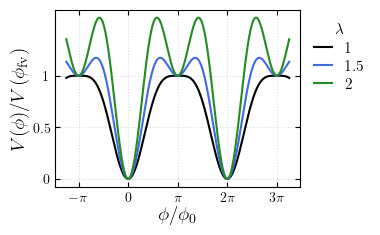

In [9]:
if True:
        tmp = 0
        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])
        sigmamom = fluct_stdev_mom(lamb, phi0, temp)

        print(sigmafld, sigmamom, right_Vmax.x, m2(lamb)**0.5, temp/m2(lamb)**0.5)
        print((right_Vmax.x-np.pi)/sigmafld)

        philist = np.linspace(-1.25*np.pi, 3.25*np.pi, 10000)

        fig, ax = plt.subplots(1, 1, figsize=(4, 2.5))
        ax.plot(philist, V(philist, 1)/V(np.pi, 1), label=r'${:.0f}$'.format(1), color='k')

        ax.plot(philist, V(philist, lamb)/V(np.pi, lamb), label=r'${:.1f}$'.format(lamb), color='royalblue')

        ax.plot(philist, V(philist, 2)/V(np.pi, 2), label=r'${:.0f}$'.format(2), color='forestgreen')

        ax.set_xlabel(r'$\phi/\phi_0$', labelpad=5)
        ax.set_ylabel(r'$V(\phi)/V(\phi_{\rm fv})$', labelpad=5)
        ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi))
        ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))

        a = [0.0, 0.5, 1.0]#ax.get_yticks().tolist()[1:-1:2]
        print(a)
        ax.set_yticks(a)
        a[0] = r'${:.0f}$'.format(a[0])
        a[1] = r'${:.1f}$'.format(a[1])
        a[2] = r'${:.0f}$'.format(a[2])
        ax.set_yticklabels(a)
       
        beautify(ax, times=-70, ttl=r'$\lambda$', bb=(1.,1.))
        plt.savefig('./plots/new_potential.pdf')
        plt.tight_layout()
        plt.show()


In [17]:
l1= [5.70767, 5.70452, 5.69505, 5.67916, 5.65669, 5.62743, 5.59114, \
5.54755, 5.4964, 5.43747, 5.37062, 5.29582, 5.21325, 5.12329, \
5.02663, 4.92421, 4.81729, 4.70734, 4.59601, 4.485, 4.37594, 4.27029, \
4.16928, 4.07383, 3.98457, 3.90184, 3.82574, 3.75619, 3.69296, \
3.63571, 3.58406, 3.53758, 3.49584, 3.45842, 3.42491, 3.39493, \
3.36812, 3.34416, 3.32275, 3.30363, 3.28655, 3.27128, 3.25765, \
3.24547, 3.23458, 3.22485, 3.21616, 3.20838, 3.20143, 3.1952, \
3.18964, 3.18466, 3.1802, 3.17621, 3.17264, 3.16944, 3.16657, 3.164, \
3.1617, 3.15964, 3.15779, 3.15613, 3.15465, 3.15331, 3.15212, \
3.15104, 3.15008, 3.14922, 3.14844, 3.14775, 3.14712, 3.14656, \
3.14606, 3.14561, 3.1452, 3.14484, 3.14451, 3.14422, 3.14395, \
3.14371, 3.1435, 3.14331, 3.14314, 3.14298, 3.14284, 3.14272, 3.1426, \
3.1425, 3.14241, 3.14233, 3.14226, 3.14219, 3.14213, 3.14208, \
3.14203, 3.14198, 3.14194, 3.14191, 3.14188, 3.14185, 3.14182]

l2= [6.16391, 6.16273, 6.15913, 6.15302, 6.14423, 6.13248, 6.11744, \
6.09867, 6.07562, 6.04763, 6.01392, 5.97354, 5.92544, 5.86839, \
5.80107, 5.72211, 5.63018, 5.52416, 5.40338, 5.26794, 5.11896, \
4.95888, 4.79139, 4.62115, 4.4532, 4.29225, 4.14205, 4.00508, \
3.88255, 3.77462, 3.68065, 3.59956, 3.53004, 3.47072, 3.42027, \
3.37746, 3.34118, 3.31048, 3.2845, 3.26254, 3.24396, 3.22826, \
3.21497, 3.20374, 3.19424, 3.1862, 3.17939, 3.17363, 3.16876, \
3.16463, 3.16113, 3.15817, 3.15565, 3.15353, 3.15172, 3.15019, \
3.14889, 3.14779, 3.14686, 3.14606, 3.14539, 3.14482, 3.14433, \
3.14392, 3.14357, 3.14328, 3.14302, 3.14281, 3.14263, 3.14247, \
3.14234, 3.14223, 3.14213, 3.14205, 3.14198, 3.14193, 3.14188, \
3.14183, 3.1418, 3.14177, 3.14174, 3.14172, 3.1417, 3.14168, 3.14167, \
3.14166, 3.14165, 3.14164, 3.14163, 3.14163, 3.14162, 3.14162, \
3.14161, 3.14161, 3.14161, 3.14161, 3.1416, 3.1416, 3.1416, 3.1416, \
3.1416]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


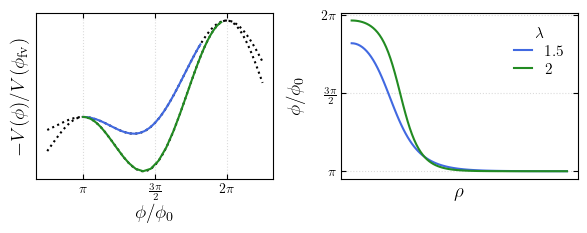

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(6, 2.5))

ax[1].plot(l1, color='royalblue', label=r'${:.1f}$'.format(1.5))
ax[1].plot(l2, color='forestgreen', label=r'${:.0f}$'.format(2))

ax[1].set_ylabel(r'$\phi/\phi_0$', labelpad=5)
ax[1].set_xlabel(r'$\rho$', labelpad=5)

ax[1].yaxis.set_major_locator(plt.MultipleLocator(np.pi/2))
ax[1].yaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))



philist = np.linspace(.75*np.pi, 2.25*np.pi, 10000)
ax[0].plot(philist, -V(philist, 1.5), color='k', ls=':')
ax[0].plot(philist, -V(philist, 2), color='k', ls=':')
  
ax[0].plot(l1, -V(l1,1.5 ), color='royalblue')
ax[0].plot(l2, -V(l2,2), color='forestgreen')

ax[0].set_xlabel(r'$\phi/\phi_0$', labelpad=5)
ax[0].set_ylabel(r'$V(\phi)$', labelpad=5)

ax[0].set_xlabel(r'$\phi/\phi_0$', labelpad=5)
ax[0].set_ylabel(r'$-V(\phi)/V(\phi_{\rm fv})$', labelpad=5)

ax[0].xaxis.set_major_locator(plt.MultipleLocator(np.pi/2))
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))

ax[0].axes.get_yaxis().set_ticks([])
beautify(ax[0], times=-100)
ax[0].yaxis.set_label_coords(-20*0.0015, 0.5)

ax[1].axes.get_xaxis().set_ticks([])
beautify(ax[1], times=-100, ttl=r'$\lambda$')
ax[1].xaxis.set_label_coords(0.5,-20*0.0015)

#ys = ax[1].get_ylim()
#ax[1].set_ylim((ys[::-1]))

plt.tight_layout()

plt.savefig('./plots/solutions.pdf')
plt.show()



0.27428630597271203 0.03977359171321589 4.251836544352683 0.1 0.8999999999999999
4.047755453286628


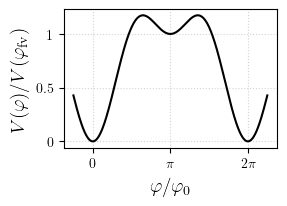

In [15]:
if True:
        tmp = 0
        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])
        sigmamom = fluct_stdev_mom(lamb, phi0, temp)

        print(sigmafld, sigmamom, right_Vmax.x, m2(lamb)**0.5, temp/m2(lamb)**0.5)
        print((right_Vmax.x-np.pi)/sigmafld)

        philist = np.linspace(-0.25*np.pi, 2.25*np.pi, 10000)

        fig, ax = plt.subplots(1, 1, figsize=(3., 2.2))
        ax.plot(philist, V(philist, lamb)/V(np.pi, lamb), label=r'$\lambda=$'+str(lamb), color='k')

        ax.set_xlabel(r'$\varphi/\varphi_0$', labelpad=5)
        ax.set_ylabel(r'$V(\varphi)/V(\varphi_{\rm fv})$', labelpad=5)
        ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi))
        ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))

        a = ax.get_yticks().tolist()[1:-1:2]
        ax.set_yticks(a)
        a[0] = r'${:.0f}$'.format(a[0])
        a[1] = r'${:.1f}$'.format(a[1])
        a[2] = r'${:.0f}$'.format(a[2])
        ax.set_yticklabels(a)
       
        ax.grid(ls=':', color='darkgray', alpha=0.5)
      # plt.legend()
        plt.savefig('./plots/potential.pdf')
        plt.tight_layout()
        plt.show()


In [8]:
[fluct_stdev(lambList[0], phi0List[0], tempList[ii]) for ii in [0,1,2,3]]

[0.27428630597271203,
 0.30326206559910246,
 0.33081957224035113,
 0.3571216688274275]

In [9]:
[fluct_stdev_mom(lambList[0], phi0List[0], tempList[ii]) for ii in [0,1,2,3]]

[0.03977359171321589,
 0.04522614119404094,
 0.050656217225139674,
 0.05606566994218313]

In [10]:
[phi0List[0]/fluct_stdev(lambList[0], phi0List[0], tempList[ii]) for ii in [0,1,2,3]]

[5.090532670392863, 4.6041478970906144, 4.220619088948682, 3.909769480468524]

In [11]:
[phi0List[0]/fluct_stdev_mom(lambList[0], phi0List[0], tempList[ii]) for ii in [0,1,2,3]]

[35.1052882440968, 30.872928017556298, 27.563514965790336, 24.904070584286945]

In [12]:
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline


In [13]:
Vbare = lambda phi, lamb: 4.*nu* (- np.cos(phi) + 0.5 * lamb**2. * np.sin(phi)**2.)
Vdoub = lambda phi, lamb: 4.*nu* (np.cos(phi) + lamb**2. * np.cos(2.*phi) )
Vtrip = lambda phi, lamb: 4.*nu* (- np.sin(phi) - 4.*lamb**2. * np.cos(phi) * np.sin(phi) )

0.01


/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


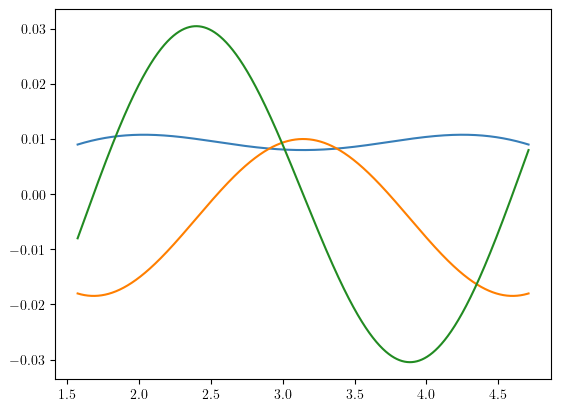

In [14]:
philist = np.linspace(0.5*np.pi, 1.5*np.pi, 10000)
yo = Vbare(philist, lambList[0])
xo = philist

plt.plot(philist, Vbare(philist, lambList[0]))
plt.plot(philist, Vdoub(philist, lambList[0]))
plt.plot(philist, Vtrip(philist, lambList[0]))

print(Vdoub(np.pi, lamb))

dyo = np.diff(yo,1)
dxo = np.diff(xo,1)

yfirst = dxo/dyo
xfirst = 0.5*(xo[:-1]+xo[1:])

dyfirst = np.diff(yfirst,1)
dxfirst = np.diff(xfirst,1)
ysecond = dyfirst/dxfirst

xsecond=0.5*(xfirst[:-1]+xfirst[1:])

#plt.plot(x[1:-1], xsecond)

0.27428630597271203 0.03977359171321589 4.251836544352683 0.1 0.8999999999999999


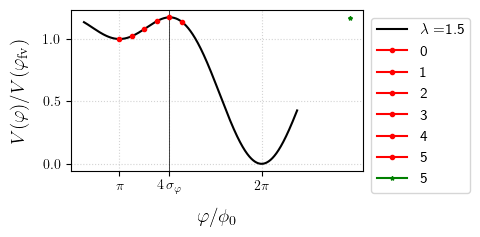

0.30326206559910246 0.04522614119404094 4.251836544352683 0.1 1.0


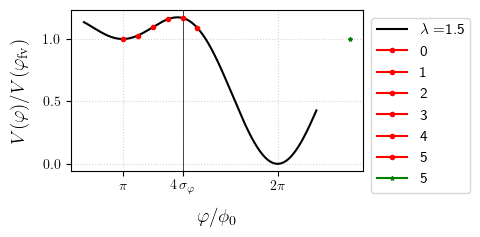

0.33081957224035113 0.050656217225139674 4.251836544352683 0.1 1.0999999999999999


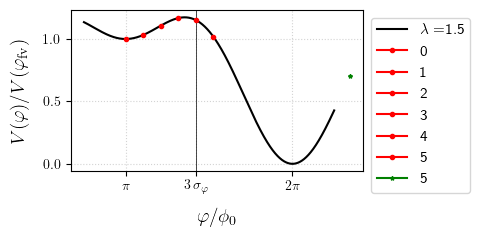

0.3571216688274275 0.05606566994218313 4.251836544352683 0.1 1.2


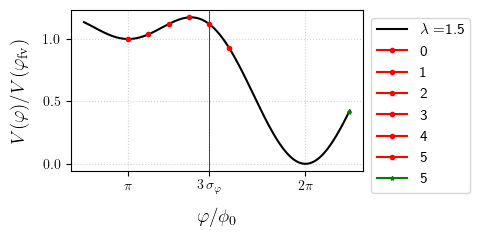

In [15]:
if True:
    for tmp in [0,1,2,3]:
        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])
        sigmamom = fluct_stdev_mom(lamb, phi0, temp)

        print(sigmafld, sigmamom, right_Vmax.x, m2(lamb)**0.5, temp/m2(lamb)**0.5)

        philist = np.linspace(0.75*np.pi, 2.25*np.pi, 10000)

        fig, ax = plt.subplots(1, 1, figsize=(5, 2.5))
       # ax.plot(philist, phi0**2.*V(philist, lamb), label=r'$\lambda=$'+str(lamb), color='k')
        ax.plot(philist, V(philist, lamb)/V(np.pi, lamb), label=r'$\lambda=$'+str(lamb), color='k')
       # ax.axvline(right_Vmax.x, ls='-', color='k', linewidth=0.5)
        ax.axvline((4.*sigmafld+np.pi), ls='-', color='k', linewidth=0.5)
        for nn in np.linspace(0, 5, 6):
            ax.plot(np.pi + nn*sigmafld, V(np.pi + nn*sigmafld, lamb)/V(np.pi, lamb), \
                    marker='o', ms=3, color='r', label=int(nn))
        ax.plot(np.pi + phi0/sigmafld, V(np.pi + phi0/sigmafld, lamb)/V(np.pi, lamb), \
                marker='*', ms=3, color='g', label=int(nn))

        ax.set_xlabel(r'$\varphi/\phi_0$', labelpad = 10)
        ax.set_ylabel(r'$V(\varphi)/V(\varphi_{\rm fv})$', labelpad = 10)
        ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi))
        ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))

        a = ax.get_xticks().tolist()[1:]
        a[2] = a[1]
        a[1] = (4.*sigmafld+np.pi)#right_Vmax.x
        ax.set_xticks(a)
        a[0] = r'$\pi$'
        a[1] = r'${:.0f}$'.format((right_Vmax.x-np.pi)/sigmafld)+r'$\, \sigma_\varphi$'
        a[2] = r'$2\pi$'
        ax.set_xticklabels(a)

        ax.grid(ls=':', color='darkgray', alpha=0.5)
        plt.legend(bbox_to_anchor=(1., 1))
       # plt.savefig('./plots/potential.pdf', dpi=500)
        plt.tight_layout()
        plt.show()


/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1.5


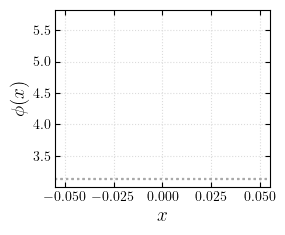

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1.5


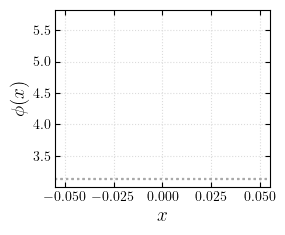

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1.5


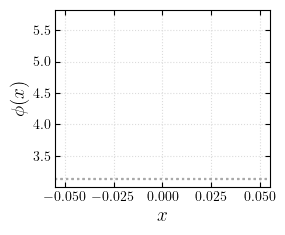

1.5


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


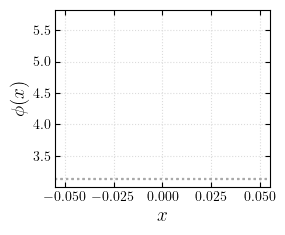

1.5


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


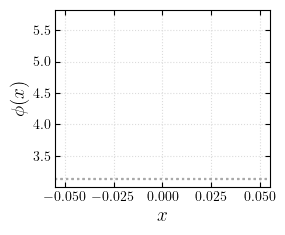

1.5


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


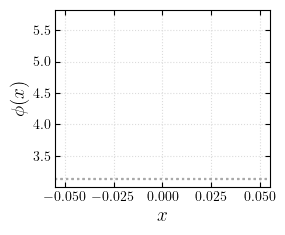

In [63]:
if True:
    for tmp in range(len(tempList)):
        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])
        print(lamb)

        fig, ax = plt.subplots(1, 1, figsize=(3, 2.5))
        for lamb in [1, 1.5, 2.]:
            def fun(y, x):
                Φ, Π = y
                dydx = [Π, -Π/x+(np.sin(Φ) + 0.5*lamb**2.*np.sin(2.*Φ))*4.*nu]
                # no friction term in thermal case
                #dydx = [Π, +(np.sin(Φ) + 0.5*lamb**2.*np.sin(2.*Φ))*4.*nu]
                return dydx

            if lamb == 1.5:
                y0 = [5.69219082899233042025, 0.] # with friction
                #y0 = [4.823729806624866, 0.] # supercrit_instanton_file
            elif lamb == 1:
                y0 = [4.14, 0.] # supercrit_instanton_file

            # as far as fortran goes:
                 #4.8238 is super-critical
                 #4.823729806620144 is sub-critical

            #y0 = [4.823729806625, 0.] # instanton_file

            x     = np.linspace(0, lenLat, 1000)
            xplot = np.linspace(np.pi*0.8, 2.*np.pi, 1000)
            sol   = odeint(fun, y0, x)

            plt.plot(x[:200]*np.sqrt(m2(lamb)), sol[:200, 0], ls='-')
            plt.axhline(np.pi, ls=':', color='darkgray')
            plt.ylabel(r'$\phi(x)$')
            plt.xlabel(r'$x$')
        beautify(ax, times=-80);
        plt.tight_layout()
        plt.show()

            # fig, ax = plt.subplots(1, 1, figsize=(3, 2.5))
            # plt.plot(xplot, Vinv(xplot, lamb), label='V', linewidth='1', alpha=0.3)
            # plt.plot(sol[:, 0], Vinv(sol[:, 0], lamb))
            # beautify(ax, times=-80);
            # plt.tight_layout()
            # plt.show()

#         ind  = np.argmin(np.abs(sol[:,0] - np.pi)); print(ind, sol[ind,0])
#         inst = np.ones(nLat//2+1) * phieq
#         inst[:ind+1] = sol[:ind+1, 0]
#         inst = np.concatenate((inst[::-1],inst[1:-1]))
#         print(np.argmax(inst))
        
#        # np.save(supercrit_instanton_file(*exp_params), inst)

#         fig, ax = plt.subplots(1, 1, figsize=(3, 2.5))
#         plt.plot(np.arange(nLat)-nLat//2, inst)
#         beautify(ax, times=-80);
#         plt.tight_layout()
#         plt.show()
#         print('Instanton saved.')

In [17]:
%run 'bubbles_codes/plotting.py'

<Figure size 640x480 with 0 Axes>

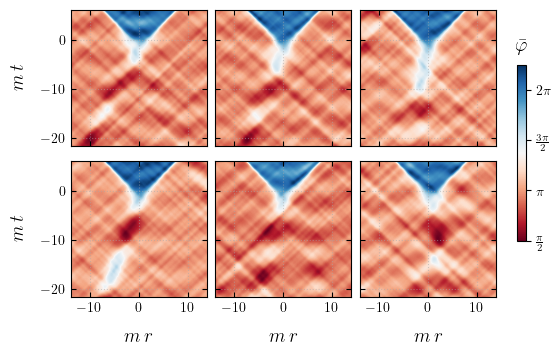

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


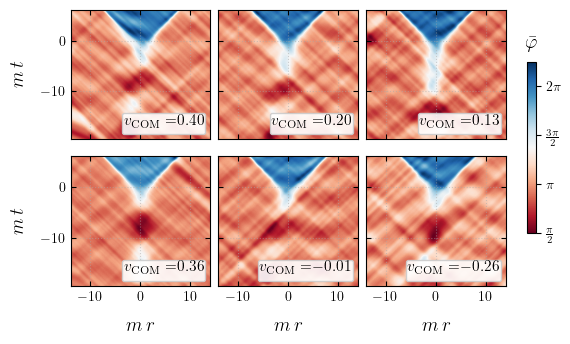

In [18]:
if True:
    simLists = []
    for tmp in [0,1,2,3]:
        simLists.append([])
        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])
        for sim in range(minSim, maxSim):
            path2CLEANsim = clean_sim_location(*exp_params, sim)
            path2RESTsim = rest_sim_location(*exp_params, sim)
            if os.path.exists(path2RESTsim) and os.path.exists(path2CLEANsim):
                simLists[-1].append(sim)
    tp = 0# 0 for average, 1 for error
    cp = 0

    titl = [r'$\bar{\varphi}$',  r'$\bar{\Pi}$', r'$\partial_x\bar{\varphi}$']

    crit_rad = 40
    crit_thresh = right_Vmax.x + 3.*sigmafld
    win = 180

    for tmp in [0,1,2,3]:
        if tmp!=0: break

        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])

        dats = random.sample(simLists[tmp], 6)
        fig, ax = plt.subplots(2,3, figsize = (5.5,3.5), sharey=True, sharex=True, constrained_layout=True)
        for si, sim in enumerate(dats):
            ci,ti = np.divmod(si,3)

            path2CLEANsim = clean_sim_location(*exp_params, sim)
            fullreal, sim, tdecay, outcome = np.load(path2CLEANsim)

            bubble2measure = fullreal[0]
            nT, nN = np.shape(bubble2measure)
            tcen, xcen = find_nucleation_center(bubble2measure, phieq, crit_thresh, crit_rad)
            tcen -= 100
            tl,tr = max(0, tcen-win), min(nT-1, tcen+win)
            xl,xr = max(0, xcen-win), min(nN-1, xcen+win)
            ext = np.array([xl-xcen,xr-xcen,tl-tcen-100,tr-tcen-100])*np.sqrt(m2(lamb))*dx

            bubble2plot = bubble2measure[tl:tr,xl:xr]
            im = ax[ci,ti].imshow(bubble2plot, interpolation=None, extent=ext, origin='lower', cmap='RdBu')

            if False:
                lavs = 6
                nT, nN = np.shape(bubble2plot)
                tt = np.linspace(tl-tcen, tr-tcen, nT)*np.sqrt(m2(lamb))*dx
                xx = np.linspace(xl-xcen, xr-xcen, nN)*np.sqrt(m2(lamb))*dx
                ttt1, xxx1 = np.meshgrid(tt, xx)
                ax[ci,ti].contour(xxx1, ttt1, bubble2plot.T, levels=lavs, aspect='auto', interpolation=None, extent=ext, origin='lower', colors='k',linewidths=0.5)

            if ci==1: ax[ci,ti].set(xlabel=r'$m \, r$')
            if ti==0: ax[ci,ti].set(ylabel=r'$m \, t$')
            ax[ci,ti].tick_params(direction='in', which='both', top=True, right=True)
            ax[ci,ti].grid(ls=':', color='darkgray', alpha=0.5)

        cbar = fig.colorbar(im, ax=ax[:, :], shrink=0.6, \
                            ticks=mticker.MultipleLocator(np.pi/2), \
                            format=mticker.FuncFormatter(multiple_formatter()))
        cbar.ax.set_title(titl[0])
        plt.savefig('./plots/examples_before'+str(temp)+'.pdf', bbox_inches='tight')
        plt.show()

        fig, ax = plt.subplots(2,3, figsize = (5.6,3.4), sharey=True, sharex=True, constrained_layout=True)
        for si, sim in enumerate(dats):
            ci,ti = np.divmod(si,3)

            path2RESTsim = rest_sim_location(*exp_params, sim)
            sim, fullreal, totbeta = np.load(path2RESTsim)

            bubble2measure = fullreal[0]
            nT, nN = np.shape(bubble2measure)
            tcen, xcen = find_nucleation_center(bubble2measure, phieq, crit_thresh, crit_rad)
            tcen -= 100
            tl,tr = max(0, tcen-win), min(nT-1, tcen+win)
            xl,xr = max(0, xcen-win), min(nN-1, xcen+win)
            ext = np.array([xl-xcen,xr-xcen,tl-tcen-100,tr-tcen-100])*np.sqrt(m2(lamb))*dx

            bubble2plot = bubble2measure[tl:tr,xl:xr]
            im = ax[ci,ti].imshow(bubble2plot, interpolation=None, extent=ext, origin='lower', cmap='RdBu')

            if False:
                lavs = 6
                nT, nN = np.shape(bubble2plot)
                tt = np.linspace(tl-tcen, tr-tcen, nT)*np.sqrt(m2(lamb))*dx
                xx = np.linspace(xl-xcen, xr-xcen, nN)*np.sqrt(m2(lamb))*dx
                ttt1, xxx1 = np.meshgrid(tt, xx)
                ax[ci,ti].contour(xxx1, ttt1, bubble2plot.T, levels=lavs, aspect='auto', interpolation=None, extent=ext, origin='lower', colors='k',linewidths=0.5)

            if ci==1: ax[ci,ti].set(xlabel=r'$m \, r$')
            if ti==0: ax[ci,ti].set(ylabel=r'$m \, t$')
            ax[ci,ti].tick_params(direction='in', which='both', top=True, right=True)
            ax[ci,ti].grid(ls=':', color='darkgray', alpha=0.5)
            ax[ci,ti].legend(title=r'$v_{\rm COM}=$'+r'${:.2f}$'.format(totbeta), loc=4, fontsize=7, fancybox=True, frameon=True, framealpha=0.9, borderpad=0.15)

        cbar = fig.colorbar(im, ax=ax[:, :], shrink=0.6, \
                            ticks=mticker.MultipleLocator(np.pi/2), \
                            format=mticker.FuncFormatter(multiple_formatter()))
        cbar.ax.set_title(titl[0])
       # plt.tight_layout()
        plt.savefig('./plots/examples_after'+str(temp)+'.pdf', bbox_inches='tight')
        plt.show()


/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # This is added back by InteractiveShellApp.init_path()
/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if sys.path[0] == "":
/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndar

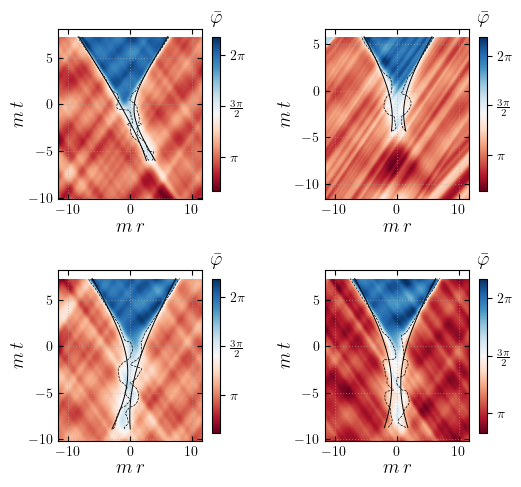

In [19]:
if True:
    data_photo1 = np.load('./plots/bubble_data_original_2.npy')
    rr1, ll1, rrwallfit1, llwallfit1, ttwallfit1, simulation1, ext1 = data_photo1
    data_photo2 = np.load('./plots/bubble_data_deboosted_2.npy')
    rr2, ll2, rrwallfit2, llwallfit2, ttwallfit2, simulation2, ext2 = data_photo2
    data_photo3 = np.load('./plots/bubble_data_original_1.npy')
    rr3, ll3, rrwallfit3, llwallfit3, ttwallfit3, simulation3, ext3 = data_photo3
    data_photo4 = np.load('./plots/bubble_data_deboosted_1.npy')
    rr4, ll4, rrwallfit4, llwallfit4, ttwallfit4, simulation4, ext4 = data_photo4

    rrs = np.array([rr1, rr2, rr3, rr4])
    lls = np.array([ll1, ll2, ll3, ll4])
    rrwallfits = np.array([rrwallfit1, rrwallfit2, rrwallfit3, rrwallfit4])
    llwallfits = np.array([llwallfit1, llwallfit2, llwallfit3, llwallfit4])
    ttwallfits = np.array([ttwallfit1, ttwallfit2, ttwallfit3, ttwallfit4])
    simulations = np.array([simulation1, simulation2, simulation3, simulation4])
    exts = np.array([ext1, ext2, ext3, ext4])

    exts = exts/dx2plot
    exts[:,2:]+=20
    exts = exts*dx2plot

    ttwallfits+=20

    dx2plot = dx * np.sqrt(m2(lamb))
    
    fig, ax = plt.subplots(2, 2, figsize = (5.5, 5))

    for ai, aa in enumerate(ax.flatten()):
        rr, ll = rrs[ai], lls[ai]
        rrwallfit, llwallfit, ttwallfit = rrwallfits[ai], llwallfits[ai], ttwallfits[ai]
        simulation, ext = simulations[ai], exts[ai]

        im0 = aa.imshow(simulation, interpolation='antialiased', extent=ext, origin='lower', cmap='RdBu', aspect='auto')

        aa.plot(rr*dx2plot, ttwallfit*dx2plot, color='k', ls='--', linewidth=0.5)
        aa.plot(ll*dx2plot, ttwallfit*dx2plot, color='k', ls='--', linewidth=0.5)

        aa.plot(rrwallfit*dx2plot, ttwallfit*dx2plot, color='k', ls='-', linewidth=0.7)
        aa.plot(llwallfit*dx2plot, ttwallfit*dx2plot, color='k', ls='-', linewidth=0.7)

        cbar = plt.colorbar(im0, ax=aa, shrink=0.9, \
                            ticks=mticker.MultipleLocator(np.pi/2), \
                            format=mticker.FuncFormatter(multiple_formatter()))
        cbar.ax.set_title(r'$\bar{\varphi}$')
        aa.tick_params(direction='in', which='both', top=True, right=True)
        aa.grid(ls=':', color='darkgray', alpha=0.5)

        aa.set_ylabel(r'$m \, t$', labelpad = 1)
        aa.set_xlabel(r'$m \, r$', labelpad = 1)
        aa.set_aspect(1.5)
    plt.tight_layout()
    plt.savefig('./plots/examples_deboost.pdf', dpi=500)
    plt.show()


/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: The following kwargs were not used by contour: 'aspect', 'interpolation'


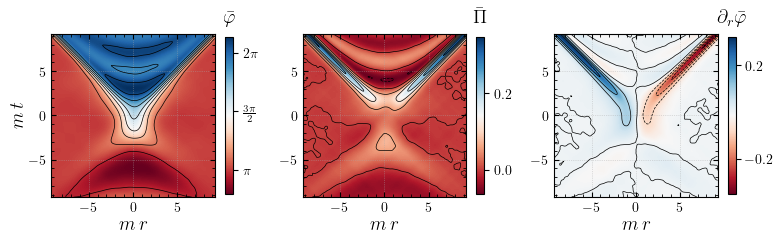

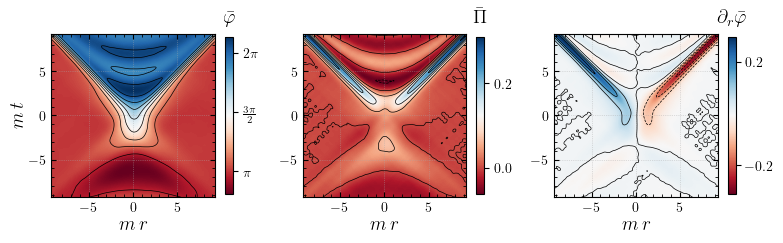

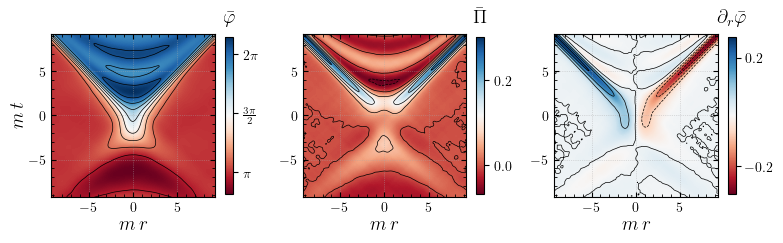

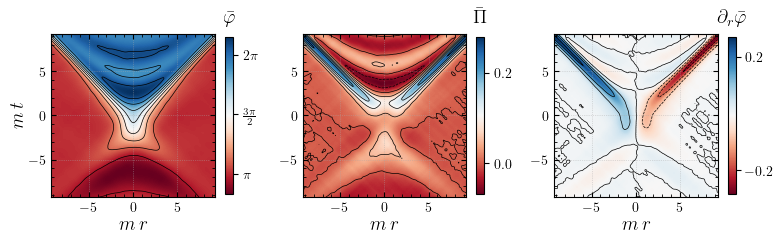

In [20]:
tp = 0# 0 for average, 1 for error

titl = [r'$\bar{\varphi}$',  r'$\bar{\Pi}$', r'$\partial_r\bar{\varphi}$']

for ii, average_bubble in enumerate(bubbleList):
    fig, ax = plt.subplots(1, 3, figsize = (8,2.5))
    for cp in range(3): # 0 - field, 1 - momentum, 2 - gradient
        tmp = tmpList[ii]
        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])

        crit_rad = 20
        crit_thresh = right_Vmax.x + 2.*sigmafld
        win = 120

        bubble2measure = average_bubble[0,0]
        nT, nN = np.shape(bubble2measure)
        tcen, xcen = find_nucleation_center(bubble2measure, phieq, crit_thresh, crit_rad)
        xcen+=1
        tl,tr = max(0, tcen-win), min(nT-1, tcen+win)
        xl,xr = max(0, xcen-win), min(nN-1, xcen+win)
        ext = np.array([xl-xcen,xr-xcen,tl-tcen,tr-tcen])*np.sqrt(m2(lamb))*dx

        bubble2plot = average_bubble[tp,cp][tl:tr,xl:xr]

        im = ax[cp].imshow(bubble2plot, interpolation=None, extent=ext, origin='lower', cmap='RdBu')
        if cp==0: cbar = plt.colorbar(im, ax=ax[cp], shrink=0.8, \
                        ticks=mticker.MultipleLocator(np.pi/2), \
                        format=mticker.FuncFormatter(multiple_formatter()))
        else:
            cbar = plt.colorbar(im, ax=ax[cp], shrink=0.8)
            lls = cbar.ax.get_ylim()
            a = cbar.ax.get_yticks().tolist()
            a = [round(al,2) for ja,al in enumerate(a) if ja%2==1][::]
            cbar.ax.set_yticks(a)
            #cbar.ax.set_ylim(a[0], a[-1])
            cbar.ax.set_ylim(lls)
            a = [r'${:.1f}$'.format(al) for al in a]
            cbar.ax.set_yticklabels(a)
            
        cbar.ax.set_title(titl[cp])

        nT, nN = np.shape(bubble2plot)
        tt = np.linspace(tl-tcen, tr-tcen, nT)*np.sqrt(m2(lamb))*dx
        xx = np.linspace(xl-xcen, xr-xcen, nN)*np.sqrt(m2(lamb))*dx
        ttt1, xxx1 = np.meshgrid(tt, xx)

        lavs = [8, 6, 8][cp]
        ax[cp].grid(True, color='k', linewidth=0.5, ls=':', alpha=0.2)
        ax[cp].contour(xxx1, ttt1, bubble2plot.T, levels=lavs, aspect='auto', interpolation=None, extent=ext, origin='lower', colors='k',linewidths=0.5)

        labss = r'$T/m = {}$'.format(round(temp/np.sqrt(m2(lamb)),1))
        
        ax[cp].grid(ls=':', color='darkgray', alpha=0.7)
        ax[cp].xaxis.set_minor_locator(MultipleLocator(1))
        ax[cp].yaxis.set_minor_locator(MultipleLocator(1))
        ax[cp].set_xlabel(r'$m \, r$', labelpad = 1)
        ax[0].set_ylabel(r'$m \, t$', labelpad = 1)

        ax[cp].yaxis.set_ticks_position('both')
        ax[cp].xaxis.set_ticks_position('both')
        ax[cp].tick_params(which='both', axis="y", direction="in")
        ax[cp].tick_params(which='both', axis="x", direction="in")
    plt.tight_layout()
    plt.savefig('./plots/average_bubble'+str(temp)+'.pdf', bbox_inches='tight')
    plt.show()


In [21]:
if False:
    for ii, average_bubble in enumerate(bubbleList):
        average_bubble = bubbleList[ii]
        tmp = tmpList[ii]
        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])

        print(*exp_params)

        critical_sim = extract_data(nLat, critical_sim_file(*exp_params))
        precursor_sim = extract_data(nLat, precursor_sim_file(*exp_params))

        titls = [r'$\rm Critical$', r'$\rm Precursor$']

        tdecay = max(0, np.shape(critical_sim)[1] - nLat//2)
        crit_thresh = right_Vmax.x + 5.*sigmafld
        critical_sim, crit_rad = centre_bubble(critical_sim, tdecay, phieq, crit_thresh)
        critical_sim = remove_collisions(critical_sim, phieq)

        print('Decay time standard, radius:', tdecay, crit_rad)
        critical_sim = critical_sim[0]
        precursor_sim = precursor_sim[0]

     #   critical_sim = gaussian_filter(critical_sim, sigma=5, mode='nearest')
     #   precursor_sim = gaussian_filter(precursor_sim, sigma=5, mode='nearest')

        truebubble = critical_sim[:nLat//4, 3*nLat//8 : 5*nLat//8]
        precursor  = precursor_sim[:nLat//4, 3*nLat//8 : 5*nLat//8]
        print(np.shape(precursor))


        nN, nT      = np.shape(truebubble)
        tcen, xcen  = find_nucleation_center(truebubble, phieq, crit_thresh, crit_rad//3)
        xcen += 1
        tl,tr,xl,xr = -tcen, nT-1-tcen, -xcen, nN-1-xcen
        exts1       = np.array([xl, xr, tl, tr])*dx*np.sqrt(m2(lamb))
        tt1, xx1    = np.linspace(tl, tr, nT)*dx*np.sqrt(m2(lamb)), np.linspace(xl, xr, nN)*dx*np.sqrt(m2(lamb))
        ttt1, xxx1  = np.meshgrid(tt1, xx1)

        tl,tr,xl,xr = 0, nT-1, -xcen, nN-1-xcen
        exts2       = np.array([xl, xr, tl, tr])*dx*np.sqrt(m2(lamb))
        tt2, xx2    = np.linspace(tl, tr, nT)*dx*np.sqrt(m2(lamb)), np.linspace(xl, xr, nN)*dx*np.sqrt(m2(lamb))
        ttt2, xxx2  = np.meshgrid(tt2, xx2)

        fig, ax = plt.subplots(1, 2, figsize = (6,3))
        ax[0].contour(xxx1, ttt1, truebubble.T, levels=3, aspect='auto', interpolation=None, extent=exts1, origin='lower', colors='k', linewidths=0.5)
        im0 = ax[0].imshow(truebubble, aspect='auto', interpolation='none', extent=exts1, origin='lower', cmap='RdBu')
        clb0 = plt.colorbar(im0, ax = ax[0], ticks = mticker.MultipleLocator(np.pi/2), format = mticker.FuncFormatter(multiple_formatter()))
        clb0.ax.set_title(r'$\bar{\varphi}$')

        ax[1].contour(xxx2, ttt2, np.abs(np.pi-precursor.T), levels=3, aspect='auto', interpolation=None, extent=exts2, origin='lower', colors='k', linewidths=0.5)
        im1 = ax[1].imshow(precursor, aspect='auto', interpolation='none', extent=exts2, origin='lower', cmap='RdBu')
        clb1 = plt.colorbar(im1, ax = ax[1], ticks = mticker.MultipleLocator(np.pi/2), format = mticker.FuncFormatter(multiple_formatter()))
        clb1.ax.set_title(r'$\bar{\varphi}$')

        for ai, aa in enumerate(ax):
          #  aa.text(5.5,.5,'TEST TEST TEST TEST',
          #            bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1},
          #            ha='center', va='center') 
            aa.text([6.8,6.2][ai], [12.,18.][ai], titls[ai], ha='center', va='center', \
                    bbox={'boxstyle':'round','facecolor':'white','alpha':0.85,'edgecolor':'k','pad':0.3}, fontsize=10)

            aa.grid(ls=':', color='darkgray', alpha=0.7)
            aa.xaxis.set_minor_locator(MultipleLocator(1))
            aa.yaxis.set_minor_locator(MultipleLocator(1))
          #  aa.set_xlabel(r'$\phi_0^{-1} \sqrt{V_0} \; r$')
          #  aa.set_ylabel(r'$\phi_0^{-1} \sqrt{V_0} \; t$')
            aa.set_xlabel(r'$m \, r$')
            aa.set_ylabel(r'$m \, t$')
            aa.yaxis.set_ticks_position('both')
            aa.xaxis.set_ticks_position('both')
            aa.tick_params(which='both', axis="y", direction="in")
            aa.tick_params(which='both', axis="x", direction="in")
           # a = aa.get_xticks().tolist()[1:-1:]
           # a = [round(al,2) for al in a]
           # aa.set_xticks(a)
           # aa.set_xticklabels(a)
            a = aa.get_yticks().tolist()[1:-1:2]
            a = [round(al,2) for al in a]
            aa.set_yticks(a)
            a = [r'${:.0f}$'.format(al) for al in a]
            aa.set_yticklabels(a)

        plt.tight_layout()
        plt.savefig('./plots/critical_and_precursor'+str(temp)+'.pdf', bbox_inches='tight', dpi=500)
        plt.show()


In [22]:
if False:
    titls = [r'$\rm Critical$', r'$\rm Subcritical$']

    super_instanton_sim = extract_data(nLat, supercrit_instanton_file(*exp_params))
    instanton_sim = extract_data(nLat, instanton_file(*exp_params))

    tdecay = max(0, np.shape(super_instanton_sim)[1] - nLat//2)
    crit_thresh = right_Vmax.x + 5.*sigmafld
    super_instanton_sim, crit_rad = centre_bubble(super_instanton_sim, tdecay, phieq, crit_thresh)
    super_instanton_sim = remove_collisions(super_instanton_sim, phieq)

    for tmp in range(len(tempList)):
        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])

     #   np.save(supercrit_instanton_file(*exp_params), super_instanton_sim[0,0,:])
     #   np.save(instanton_file(*exp_params), instanton_sim[0,0,:])

    print('Decay time standard, radius:', tdecay, crit_rad)
    super_bubble = super_instanton_sim[0, 40:nLat//3+41, nLat//3:2*nLat//3+1]
    bubble       = instanton_sim[0, 40:nLat//3+41, nLat//3:2*nLat//3+1]

    nN, nT      = np.shape(super_bubble)
    tcen, xcen  = find_nucleation_center(super_bubble, phieq, crit_thresh, crit_rad//3)

    tl,tr,xl,xr = -tcen, nT-1-tcen, -xcen, nN-1-xcen
    exts1       = np.array([xl, xr, tl, tr])*dx*np.sqrt(m2(lamb))
    tt1, xx1    = np.linspace(tl, tr, nT)*dx*np.sqrt(m2(lamb)), np.linspace(xl, xr, nN)*dx*np.sqrt(m2(lamb))
    ttt1, xxx1  = np.meshgrid(tt1, xx1)

    tl,tr,xl,xr = 0, nT-1, -xcen, nN-1-xcen
    exts2       = np.array([xl, xr, tl, tr])*dx*np.sqrt(m2(lamb))
    tt2, xx2    = np.linspace(tl, tr, nT)*dx*np.sqrt(m2(lamb)), np.linspace(xl, xr, nN)*dx*np.sqrt(m2(lamb))
    ttt2, xxx2  = np.meshgrid(tt2, xx2)

    fig, ax = plt.subplots(1, 2, figsize = (6,3))
    ax[0].contour(xxx1, ttt1, super_bubble.T, levels=4, aspect='auto', interpolation='none', extent=exts1, origin='lower', colors='k', linewidths=0.5)
    im0 = ax[0].imshow(super_bubble, aspect='auto', interpolation='none', extent=exts1, origin='lower', cmap='RdBu')
    clb0 = plt.colorbar(im0, ax = ax[0], ticks = mticker.MultipleLocator(np.pi/2), format = mticker.FuncFormatter(multiple_formatter()))
    clb0.ax.set_title(r'$\bar{\varphi}$')

    ax[1].contour(xxx2, ttt2, bubble.T, levels=7, aspect='auto', interpolation='none', extent=exts2, origin='lower', colors='k', linewidths=0.5)
    im1 = ax[1].imshow(bubble, aspect='auto', interpolation='none', extent=exts2, origin='lower', cmap='RdBu')
    clb1 = plt.colorbar(im1, ax = ax[1], ticks = mticker.MultipleLocator(np.pi/2), format = mticker.FuncFormatter(multiple_formatter()))
    clb1.ax.set_title(r'$\bar{\varphi}$')

    for ai, aa in enumerate(ax):
      #  aa.text(5.5,.5,'TEST TEST TEST TEST',
      #            bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1},
      #            ha='center', va='center') 
        aa.text([9.,7.2][ai], [-7.8,2.][ai], titls[ai], ha='center', va='center', \
                bbox={'boxstyle':'round','facecolor':'white','alpha':0.85,'edgecolor':'k','pad':0.3}, fontsize=9)

        aa.grid(ls=':', color='darkgray', alpha=0.7)
        aa.xaxis.set_minor_locator(MultipleLocator(1))
        aa.yaxis.set_minor_locator(MultipleLocator(1))
      #  aa.set_xlabel(r'$\phi_0^{-1} \sqrt{V_0} \; r$')
      #  aa.set_ylabel(r'$\phi_0^{-1} \sqrt{V_0} \; t$')
        aa.set_xlabel(r'$m \, r$')
        aa.set_ylabel(r'$m \, t$')
        aa.yaxis.set_ticks_position('both')
        aa.xaxis.set_ticks_position('both')
        aa.tick_params(which='both', axis="y", direction="in")
        aa.tick_params(which='both', axis="x", direction="in")
    plt.tight_layout()
    plt.savefig('./plots/bare_spheleron.pdf', dpi=500)
    plt.show()
    
    tmp = 0
    phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
    exp_params = np.asarray([nLat, lamb, phi0, temp])
    print(*exp_params)

    instanton = np.load(instanton_file(*exp_params))# - np.pi
    supercritinstanton = np.load(supercrit_instanton_file(*exp_params))# - np.pi
    print(np.shape(instanton), np.shape(supercritinstanton))

    xmin, xmax = nLat//3, nLat*2//3
    #plt.plot(xlist[xmin:xmax], instanton[xmin:xmax])
    #plt.plot(xlist[xmin:xmax], supercritinstanton[xmin:xmax])
    plt.plot(xlist[xmin:xmax], supercritinstanton[xmin+1:xmax+1] - instanton[xmin:xmax])
    plt.plot(xlist[xmin:xmax], supercritinstanton[xmin:xmax] - super_instanton_sim[0,0,xmin:xmax])
    plt.plot(xlist[xmin:xmax], instanton[xmin:xmax] - instanton_sim[0,0,xmin:xmax])
    plt.show()

    crit_soln_f90 = '(/'
    for ind, iii in enumerate(instanton):
        crit_soln_f90 = crit_soln_f90 + str(iii)
        if ind != len(instanton)-1:
            crit_soln_f90 = crit_soln_f90 + ', '
    crit_soln_f90 += '/)'
    #print(crit_soln_f90)

In [23]:
if False:
    tmp = 5
    phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
    exp_params = np.asarray([nLat, lamb, phi0, temp])

    undecayed_sims = np.load(sims_notdecayed_file(*exp_params, minSim, maxSim, nTimeMAX))
    print(undecayed_sims[:,0])

    decay_times  = np.load(decay_times_file(*exp_params, minSim, maxSim, nTimeMAX))
    
    minDecTime  = 4*nLat
    alltimes    = decay_times[:,1]
    simList2Do  = decay_times[alltimes>=minDecTime, 0]
    print(simList2Do)

  #  sims_decayed   = np.load(sims_decayed_file(*exp_params, minSim, maxSim, nTimeMAX))

    choose = random.sample(undecayed_sims[:,0].tolist(), 1)
    for sim in choose:
        path2sim = sim_location(*exp_params, sim)
        
        real, cho = get_realisation(nLat, sim, phieq, path2sim)
        nC, nT, nN = np.shape(real)
        print('Sim, nT, outcome', sim, nT, cho)

        bubble = real[0,:]#nT-3*nLat//4]
        nT, nN = np.shape(bubble)
        ax1 = simple_imshow(bubble, [0,nT,0,nN], 'Simulation '+str(sim))
        plt.show()
        
        fftbubble = np.fft.fft2(bubble)
        nT, nN = np.shape(fftbubble)
        #fftbubble = fftbubble[:nT//2,:nN//2]
        fftbubble[:, nN*4//10:nN*6//10+1] = 0.
        ax2 = simple_imshow(np.log(fftbubble.real), [0,nT,0,nN], 'Simulation '+str(sim))

        bubble2 = np.fft.ifft2(fftbubble)
        nT, nN = np.shape(bubble2)
        ax3 = simple_imshow(bubble2.real, [0,nT,0,nN], 'Simulation '+str(sim))
        ax4 = simple_imshow(bubble2.imag, [0,nT,0,nN], 'Simulation '+str(sim))

        ax5 = simple_imshow(bubble2.real-bubble, [0,nT,0,nN], 'Simulation '+str(sim))
        
        if False:
#        if sim in sims_decayed[:,0]:
            path2CLEANsim = clean_sim_location(*exp_params, sim)
            real, sim, tdecay, outcome = np.load(path2CLEANsim)

            bubble = real[0,-nLat:]
            nT, nN = np.shape(bubble)
            simple_imshow(bubble, [0,nT,0,nN], 'Simulation '+str(sim))
            print('Sim, outcome0, outcome1, tdecay', sim, outcome, cho, tdecay)


1003
2192
3165
3711


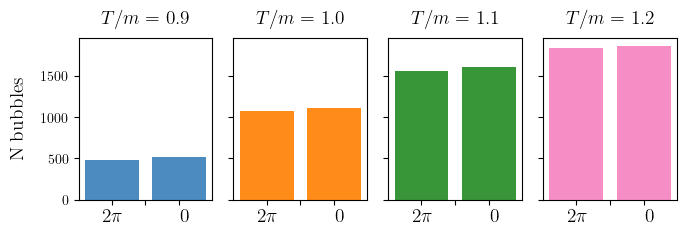

In [24]:
# Classify decays
fig, ax = plt.subplots(1, len(tempList[:4]), figsize = (7,2.5), sharey=True)
plt.style.use('seaborn-whitegrid') # nice and clean grid

cols=cycle(allcolors)
for tmp in range(len(tempList[:4])):
    phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
    exp_params = np.asarray([nLat, lamb, phi0, temp])

    undecayed_sims = np.load(sims_notdecayed_file(*exp_params, minSim, maxSim, nTimeMAX))
    decayed_sims = np.load(sims_decayed_file(*exp_params, minSim, maxSim, nTimeMAX))
    decay_times = np.load(decay_times_file(*exp_params, minSim, maxSim, nTimeMAX))

    outcomes = decayed_sims[:,1]; print(len(outcomes))

    labs = r'$T/m={:.1f}$'.format(temp/np.sqrt(m2(lamb)))
    ax[tmp].hist(outcomes, density=False, bins=2, rwidth=0.8, color=next(cols), alpha=0.9, linewidth=0.5)
    ax[tmp].set_xlabel(r'$2\pi \quad\quad\quad 0$')
    ax[0].set_ylabel(r'$\rm N \; bubbles$')
    ax[tmp].set_title(labs)
    ax[tmp].axes.xaxis.set_ticklabels([])
    ax[tmp].xaxis.set_label_coords(0.5, -0.05)
plt.tight_layout()
plt.savefig('./plots/vacuum_choice.pdf')
plt.show()


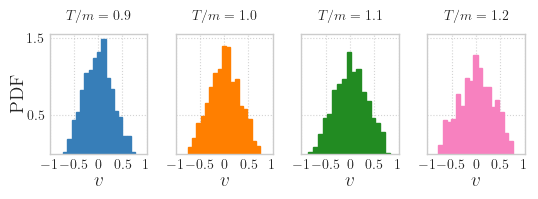

In [25]:
fig, ax = plt.subplots(1,4, figsize = (5.5,2.2), sharey='row', gridspec_kw={'width_ratios': [1,1,1,1]})
cols = cycle(allcolors[:4])
save_gauss_fit = []
for ii, average_bubble in enumerate(bubbleList):
    tmp = tmpList[ii]
    phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
    exp_params = np.asarray([nLat, lamb, phi0, temp])
    labss = r'$T/m = {}$'.format(round(temp/np.sqrt(m2(lamb)),1))#labl(lamb, phi0, temp)

    veldata = np.array(np.load(velocities_file(*exp_params)))
    simvels, all_vels = veldata[:,0].astype(int), veldata[:,1]

    col = next(cols)
    n, bins, patches = ax[ii].hist(all_vels, bins=17, alpha=1, color=col, density=True, ec=col)#, label=labss)
    n = n[1:]
    bins = bins[1:]
    centers = 0.5*(bins[1:] + bins[:-1])

    xlist = np.linspace(-1., 1, 1000)

    gauss_fit = lambda x, mean, std: np.exp(- (x - mean)**2. / (2.*std**2.)) / np.sqrt(2.*np.pi*std**2.)
    fit_gauss = lambda x, data: sco.curve_fit(gauss_fit, x, data)[0]

 #   best_gauss = fit_gauss(centers, n)
 #   ax[ii].plot(xlist, gauss_fit(xlist, *best_gauss), color='k', ls='--')
 #   save_gauss_fit.append(best_gauss[-1])

 #   bb = sigma_crit[tmp]**0.5
 #   ax[ii].plot(xlist, gauss_fit(xlist, 0., bb), color='k', ls='-')

 #   ax[ii].plot(xlist, gauss_fit(xlist, np.mean(all_vels), np.std(all_vels)), color='k', ls=':')

    a = ax[ii].get_xticks().tolist()[1:-1:]
    a = np.linspace(-1, 1, 5)
    a[::2] = np.array(a[::2], dtype='int')
    ax[ii].set_xticks(a)
    b = [r'${:.1f}$'.format(al) for al in a]
    b[::2] = [r'${:.0f}$'.format(al) for al in a[::2]]
    ax[ii].set_xticklabels(b)
    ax[ii].grid(ls=':', color='darkgray',alpha=0.5)
    ax[ii].set_xlabel(r'$v$')
    ax[ii].set_title(labss, fontsize=10)
    ax[ii].tick_params(direction='in', which='both', top=True, right=True)

    ax[ii].yaxis.set_label_coords(-0.23, 0.5)
    ax[ii].xaxis.set_label_coords(0.5, -0.15)

a = ax[0].get_yticks().tolist()[1:-1:2]
a = [round(al,2) for al in a]
ax[0].set_yticks(a)
b = [r'${:.1f}$'.format(al) for al in a]
ax[0].set_yticklabels(b)
ax[0].set_ylabel(r'$\rm PDF$')

plt.tight_layout()
plt.savefig('./plots/comparison_vels_PDF.pdf')
plt.show()


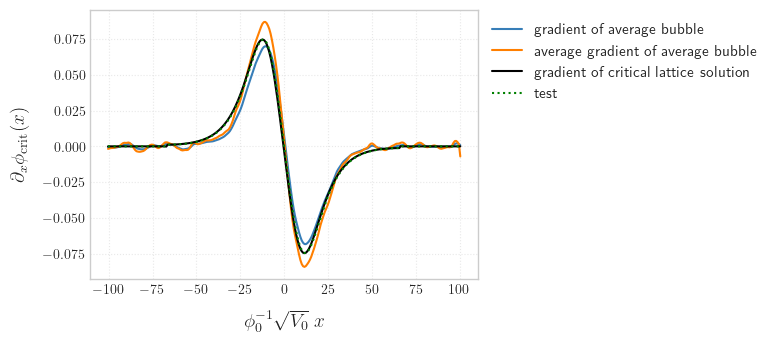

In [34]:
tmp = tmpList[0]
phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)

instanton = instantonList[tmp]
gradinst  = (np.roll(instanton,-1) - instanton)/dx

gradinst2 = np.gradient(instanton, dx)

testgrd = fldcritList[tmp][-1,:]*dx

testfld = fldcritList[tmp][0,:]
testfld = (np.roll(testfld,-1) - testfld)/dx

xtest = (np.arange(nLat) - nLat//2) * dx
cds   = np.array(np.linspace(nLat//2-len(testgrd)//2, nLat//2+len(testgrd)//2, len(testgrd)), dtype='int')

fig, ax = plt.subplots(1, 1, figsize = (5,3.5))
#ax.plot(xtest[cds], instanton[cds] - phieq, ls='-', label='instanton')
ax.plot(xtest[cds], testgrd, ls='-', label='gradient of average bubble')
ax.plot(xtest[cds], testfld, ls='-', label='average gradient of average bubble')
ax.plot(xtest[cds], gradinst[cds], ls='-',color='k', label='gradient of critical lattice solution')
ax.plot(xtest[cds], gradinst2[cds], ls=':',color='g', label='test')

ax.legend(ncol=1, frameon=False, bbox_to_anchor=(1, 1))
ax.set_ylabel(r'$\partial_x \phi_{\rm crit}(x)$')
ax.set_xlabel(r'$\phi_0^{-1} \sqrt{V_0} \; x$')
plt.grid(True, ls=':', color='lightgray', alpha=0.5)
plt.show()

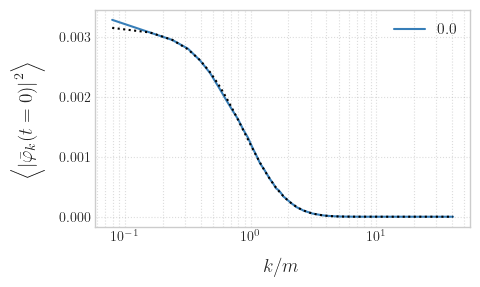

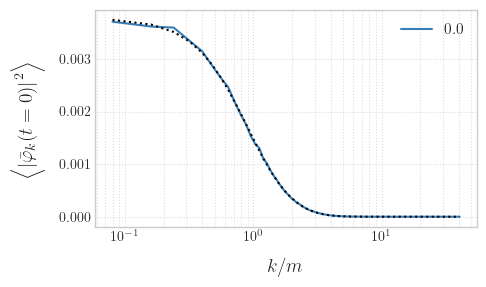

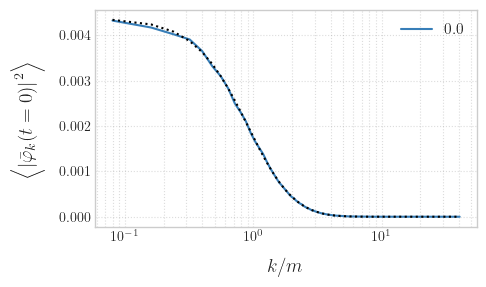

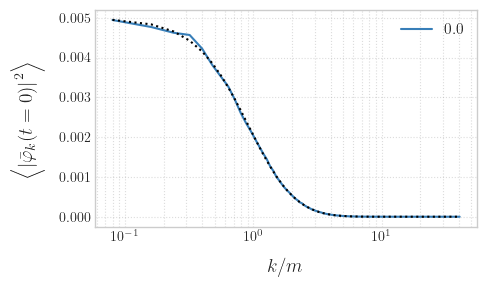

In [27]:
if True:
    for tmp in range(len(tempList)):
        if tmp==4: break
        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])

        aa, bb = 1, nLat//2

        ALL_powspec1 = np.load(powspec_tlist_file(*exp_params, minSim, 2000))
        tlist, PSfld1 = ALL_powspec1[0][:1], ALL_powspec1[1][:, 0, :1, aa:bb]
        del ALL_powspec1
        ALL_powspec2 = np.load(powspec_tlist_file(*exp_params, 2000, maxSim))
        tlist, PSfld2 = ALL_powspec2[0][:1], ALL_powspec2[1][:, 0, :1, aa:bb]
        del ALL_powspec2
        curve = np.nanmean(np.concatenate((PSfld1[:,0], PSfld2[:,0]), axis=0), axis=0)
        del PSfld1, PSfld2

        fig, ax = plt.subplots(1,1, figsize = (5.,3.))
        lab = r'${:.1f}$'.format(round(tlist[0]*dx*np.sqrt(m2(lamb)),1))
        plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), curve, ls='-', label=lab)
        plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), pspec(lamb, phi0, temp)[aa:bb], color='k', ls=':')

        plt.xscale('log')
        ax.legend(frameon=False, loc=1)
        ax.grid(which='both', color='darkgray', ls=':', alpha=0.4)
        ax.tick_params(direction='in', which='both', top=True, right=True)
        ax.set_ylabel(r'$\left\langle \left|\bar{\varphi}_k(t=0)\right|^2 \right\rangle $')
        ax.set_xlabel(r'$k/m$')
        plt.tight_layout()
        plt.show()


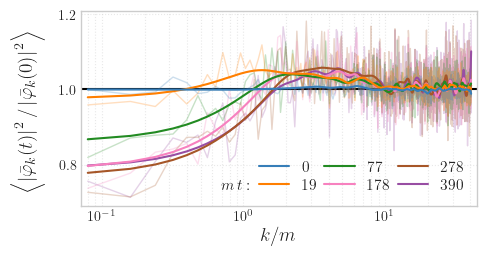

In [28]:
if True:
    clls = allcolors
    for tmp in range(len(tempList)):
        if tmp!=3: continue
        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])

        # 0 for field; 1 for momentum 
        find = 0
        # modes to plot:
        aa, bb = 1, knyq-1
        # time steps to plot
        tslist = np.array([0,5,20,46,72,101])

        ALL_powspec1 = np.load(powspec_tlist_file(*exp_params, minSim, 2000))
        tlist, PSfld1 = ALL_powspec1[0][tslist], ALL_powspec1[1][:, find, tslist, aa:bb]
        del ALL_powspec1

        ALL_powspec2 = np.load(powspec_tlist_file(*exp_params, 2000, maxSim))
        tlist, PSfld2 = ALL_powspec2[0][tslist], ALL_powspec2[1][:, find, tslist, aa:bb]
        del ALL_powspec2

        fig, ax = plt.subplots(1,1, figsize = (5.,2.7))
        plt.axhline(1., ls='-', color='k')
        for tind, tt in enumerate(reversed(tlist)):
            tind = len(tlist) - 1 - tind
            curve = np.nanmean(np.concatenate((PSfld1[:,tind], PSfld2[:,tind]), axis=0), axis=0)
            curve/=pspec(lamb, phi0, temp)[aa:bb]

            plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), curve, ls='-', color=clls[tind], alpha=0.25, lw=1)

        for tind, tt in enumerate(reversed(tlist)):
            tind = len(tlist) - 1 - tind
            curve = np.nanmean(np.concatenate((PSfld1[:,tind], PSfld2[:,tind]), axis=0), axis=0)
            curve/=pspec(lamb, phi0, temp)[aa:bb]

            lab = r'${:.0f}$'.format(round(tt*dx*np.sqrt(m2(lamb)),0))
            curve = gaussian_filter1d(curve, 6, mode='nearest')
            plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), curve, ls='-', color=clls[tind], label=lab)

        del PSfld1, PSfld2

        h, l = ax.get_legend_handles_labels() # Extracting handles and labels
        h = h[::-1]
        l = l[::-1]
        handles = [plt.plot([],marker="", ls="")[0]]*2 + h
        labels = ['', r'$m\,t:$'] + l  # Merging labels
        leg = ax.legend(handles, labels, ncol=4, frameon=False, loc=4, labelspacing=0.3, columnspacing=0.5)#._legend_box.align='left'

        ax.set_xlim((klist[aa]/np.sqrt(m2(lamb))*0.9, klist[bb-1]/np.sqrt(m2(lamb))*1.1))
        a = ax.get_yticks().tolist()[2::2]
        ax.set_yticks(a)
        ax.grid(which='both', ls=':', color='lightgray', alpha=0.5)
        ax.tick_params(direction='in', which='both', top=True, right=True)
        ax.ticklabel_format(axis='both', style='scientific', scilimits=[0.,0.])
        ax.set_xscale('log')
        ax.set_xlabel(r'$k/m$')
        ax.set_ylabel(r'$\left\langle \left|\bar{\varphi}_k(t)\right|^2 / \left|\bar{\varphi}_k(0)\right|^2 \right\rangle $')
        ax.xaxis.set_label_coords(0.5, -0.1)
        plt.tight_layout()
        plt.savefig('./plots/powespec_tevol.pdf')
        plt.show()


In [14]:
6*dk/np.sqrt(m2(lamb))

0.4768602367582128

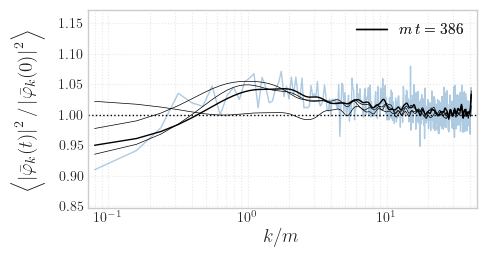

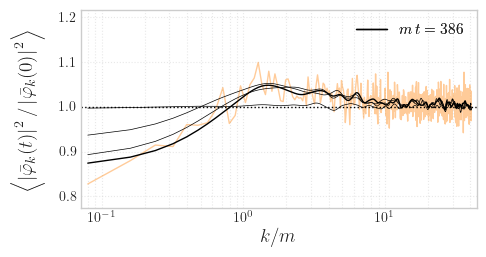

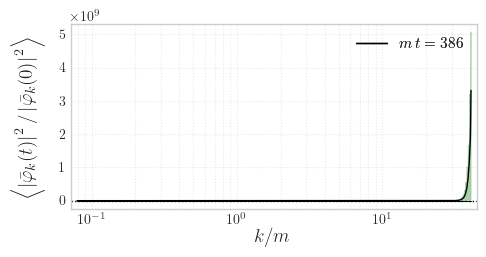

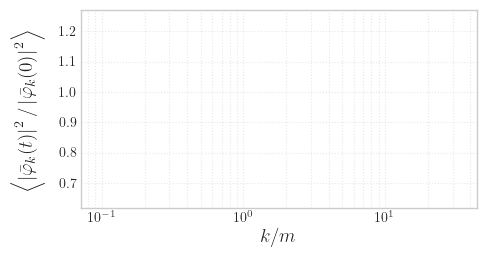

In [32]:
if False:
    for tmp in range(len(tempList[:4])):
 #       if tmp!=3: continue
        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])

        # 0 for field; 1 for momentum 
        find = 0
        # modes to plot:
        aa, bb = 1, knyq-1
        # time steps to plot

        ALL_powspec1 = np.load(powspec_tlist_file(*exp_params, minSim, 2000))
        tlist, PSfld1 = ALL_powspec1[0][:], ALL_powspec1[1][:, find, :, aa:bb]
        del ALL_powspec1

        ALL_powspec2 = np.load(powspec_tlist_file(*exp_params, 2000, maxSim))
        tlist, PSfld2 = ALL_powspec2[0][:], ALL_powspec2[1][:, find, :, aa:bb]
        del ALL_powspec2

        fig, ax = plt.subplots(1,1, figsize = (5.,2.7))
        camera = Camera(fig)
        for tind, tt in enumerate(tlist[:-2]):
            curve = np.nanmean(np.concatenate((PSfld1[:,tind], PSfld2[:,tind]), axis=0), axis=0)
            curve/=pspec(lamb, phi0, temp)[aa:bb]
            
            plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), curve, ls='-', color=allcolors[tmp], alpha=0.4, lw=1)

            curve = gaussian_filter1d(curve, 4, mode='nearest')
            if tind==0: curve0 = curve
            if tind==33: curve1 = curve
            if tind==66: curve2 = curve

            slice = plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), curve, ls='-', color='k', lw=1)
            plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), curve0, ls='-', color='k', lw=0.5)
            if tind>33:
                plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), curve1, ls='-', color='k', lw=0.5)
            if tind>66:
                plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), curve2, ls='-', color='k', lw=0.5)
            ax.axhline(1., ls=':', color='k', lw=1)

            ax.set_xlim((klist[aa]/np.sqrt(m2(lamb))*0.9, klist[bb-1]/np.sqrt(m2(lamb))*1.1))
            ax.grid(which='both', ls=':', color='lightgray', alpha=0.5)
            ax.tick_params(direction='in', which='both', top=True, right=True)
            #ax.ticklabel_format(axis='both', style='scientific', scilimits=[0.,0.])
            ax.set_xscale('log')
            ax.set_xlabel(r'$k/m$')
            ax.set_ylabel(r'$\left\langle \left|\bar{\varphi}_k(t)\right|^2 / \left|\bar{\varphi}_k(0)\right|^2 \right\rangle $')
            ax.xaxis.set_label_coords(0.5, -0.1)
            ax.legend(slice, [r'$m \, t = {:.0f}$'.format(round(tt*dx*np.sqrt(m2(lamb)),0))], loc=1, frameon=False)
            plt.tight_layout()
            camera.snap()
        animation = camera.animate(interval = 0.05);
        animation.save('./plots/animation_powespec_tevol'+batch_params(*exp_params)+'.gif', writer = 'imagemagick')

        del PSfld1, PSfld2


In [35]:
savemeff = np.load('./data/best_fit_late_time_masses.npy')
view_meff_func_t = np.load('./data/best_fit_all_masses.npy')
save_teff_from_fld = np.load('./data/best_fit_late_time_field_temperatures.npy')
save_teff_from_mom = np.load('./data/best_fit_late_time_momentum_temperatures.npy')
save_teff_from_mom_lower_bound = np.load('./data/best_fit_late_time_momentum_lower_bound_temperatures.npy')
save_teff_from_mom_upper_bound = np.load('./data/best_fit_late_time_momentum_upper_bound_temperatures.npy')


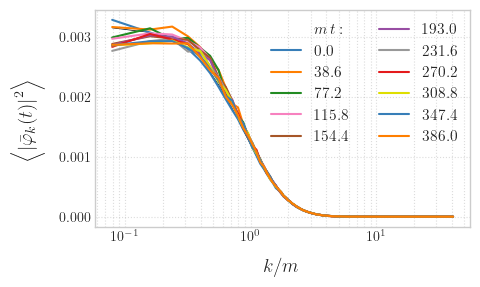

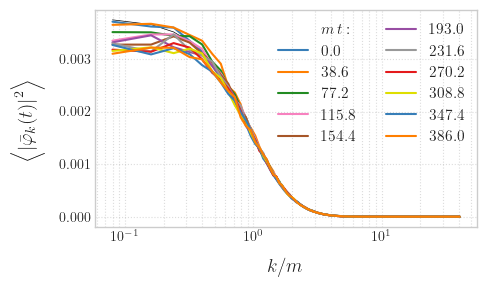

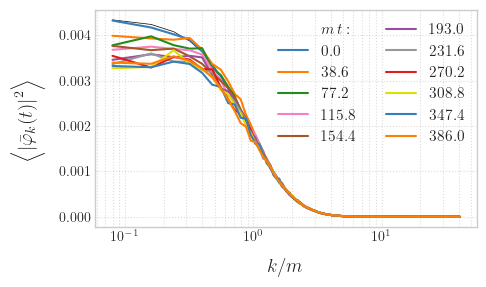

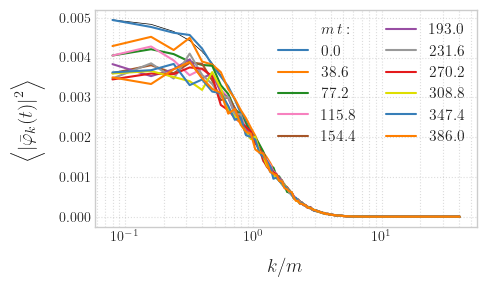

In [30]:
if True:
    for tmp in range(len(tempList)):
        if tmp==4: break
        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])

        # 0 for field; 1 for momentum 
        find = 0
        # modes to plot:
        aa, bb = 1, knyq-1
        # time steps to plot
        tstep = 10
        # if tind not in np.array([0,2,7,27,46]): continue

        ALL_powspec1 = np.load(powspec_tlist_file(*exp_params, minSim, 2000))
        tlist, PSfld1 = ALL_powspec1[0][::tstep], ALL_powspec1[1][:, find, ::tstep, aa:bb]
        del ALL_powspec1

        ALL_powspec2 = np.load(powspec_tlist_file(*exp_params, 2000, maxSim))
        tlist, PSfld2 = ALL_powspec2[0][::tstep], ALL_powspec2[1][:, find, ::tstep, aa:bb]
        del ALL_powspec2

        fig, ax = plt.subplots(1,1, figsize = (5.,3.))
        plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), pspec(lamb, phi0, temp)[aa:bb], color='k', linewidth=0.5)
        for tind, tt in enumerate(tlist):
            curve = np.nanmean(np.concatenate((PSfld1[:,tind], PSfld2[:,tind]), axis=0), axis=0)

            lab = r'${:.1f}$'.format(round(tt*dx*np.sqrt(m2(lamb)),1))
            plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), curve, ls='-', label=lab)

        del PSfld1, PSfld2

        h, l = ax.get_legend_handles_labels() # Extracting handles and labels
        handles = [plt.plot([],marker="", ls="")[0]] + h
        labels = [r'$m\,t:$'] + l  # Merging labels
        leg = ax.legend(handles, labels, ncol=2, frameon=False, loc=1)

        ax.grid(which='both', color='darkgray', ls=':', alpha=0.4)
        ax.tick_params(direction='in', which='both', top=True, right=True)
        ax.set_xscale('log')
        #ax.set_yscale('log')
        ax.set_ylabel(r'$\left\langle \left|\bar{\varphi}_k(t)\right|^2 \right\rangle $')
        ax.set_xlabel(r'$k/m$')
        plt.tight_layout()
        plt.savefig('./plots/powespec_tevol.pdf')
        plt.show()


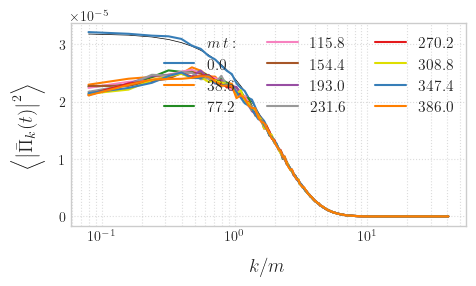

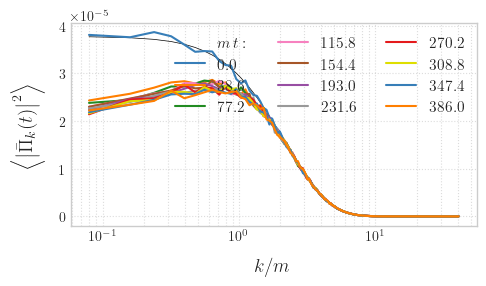

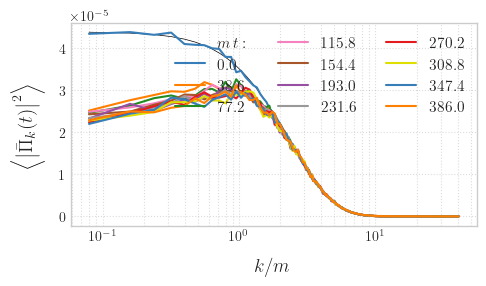

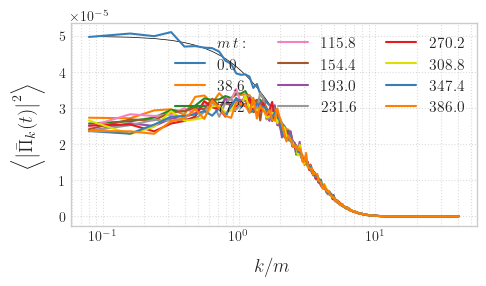

In [31]:
if True:
    for tmp in range(len(tempList)):
        if tmp==4: break
        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])

        # 0 for field; 1 for momentum 
        find = 1
        # modes to plot:
        aa, bb = 1, knyq-1
        # time steps to plot
        tstep = 10

        ALL_powspec1 = np.load(powspec_tlist_file(*exp_params, minSim, 2000))
        tlist, PSfld1 = ALL_powspec1[0][::tstep], ALL_powspec1[1][:, find, ::tstep, aa:bb]
        del ALL_powspec1

        ALL_powspec2 = np.load(powspec_tlist_file(*exp_params, 2000, maxSim))
        tlist, PSfld2 = ALL_powspec2[0][::tstep], ALL_powspec2[1][:, find, ::tstep, aa:bb]
        del ALL_powspec2

        fig, ax = plt.subplots(1,1, figsize = (5.,3.))
        plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), (w2(lamb)*pspec(lamb, phi0, temp))[aa:bb], color='k', linewidth=0.5)

        for tind, tt in enumerate(tlist):
            curve = np.nanmean(np.concatenate((PSfld1[:,tind], PSfld2[:,tind]), axis=0), axis=0)

            lab = r'${:.1f}$'.format(round(tt*dx*np.sqrt(m2(lamb)),1))
            plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), curve, ls='-', label=lab)

        del PSfld1, PSfld2

        h, l = ax.get_legend_handles_labels() # Extracting handles and labels
        handles = [plt.plot([],marker="", ls="")[0]] + h
        labels = [r'$m\,t:$'] + l  # Merging labels
        leg = ax.legend(handles, labels, ncol=3, frameon=False, loc=1)

        ax.grid(which='both', color='darkgray', ls=':', alpha=0.4)
        ax.tick_params(direction='in', which='both', top=True, right=True)
        ax.set_xscale('log')
        ax.set_ylabel(r'$\left\langle \left|\bar{\Pi}_k(t)\right|^2 \right\rangle $')
        ax.set_xlabel(r'$k/m$')
        plt.tight_layout()
        plt.savefig('./plots/powespec_tevol.pdf')
        plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


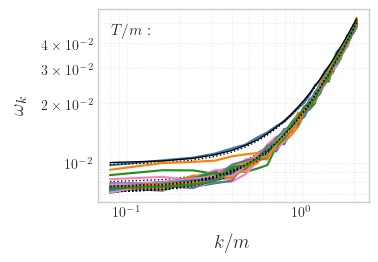

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


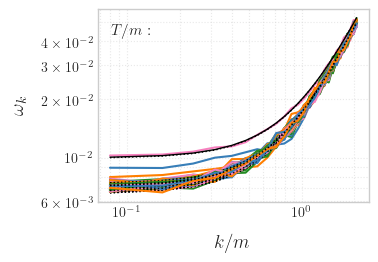

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


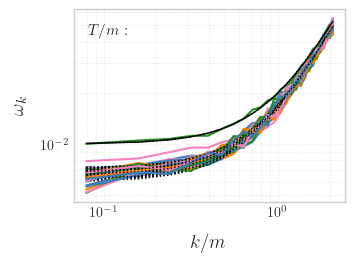

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


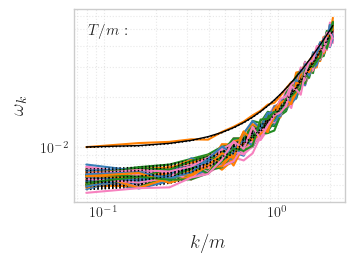

In [49]:
if True:
    view_meff_func_t = []
    cls = cycle(allcolors[:4])
    for tmp in range(len(tempList)):
        if tmp==4: break
        view_meff_func_t.append([])
        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])

        # modes to plot:
        indmax = np.arange(len(klist))[(klist/np.sqrt(m2(lamb))>0.)&(klist/np.sqrt(m2(lamb))<=2.2)][-1]
        aa, bb = 1, indmax#knyq//5
        tslist = np.arange(0,103,1)

        ALL_powspec1 = np.load(powspec_tlist_file(*exp_params, minSim, 2000))
        tlist, PSfld1, PSmom1 = ALL_powspec1[0][tslist], ALL_powspec1[1][:, 0, tslist, aa:bb], ALL_powspec1[1][:, 1, tslist, aa:bb]
        del ALL_powspec1
        ALL_powspec2 = np.load(powspec_tlist_file(*exp_params, 2000, maxSim))
        tlist, PSfld2, PSmom2 = ALL_powspec2[0][tslist], ALL_powspec2[1][:, 0, tslist, aa:bb], ALL_powspec2[1][:, 1, tslist, aa:bb]
        del ALL_powspec2

        w2m      = lambda ks, m: ks**2. + m**2.
        pofk     = lambda ks, m: w2m(ks, m)
        pred_fit = lambda x, data: sco.curve_fit(pofk, x, data, p0=0.09)[0]

        fig, ax = plt.subplots(1,1, figsize = (3.5,2.5))
        for tind, tt in enumerate(tlist):
            avPSfld = np.nanmean(np.concatenate((PSfld1[:,tind], PSfld2[:,tind]), axis=0), axis=0)
            avPSmom = np.nanmean(np.concatenate((PSmom1[:,tind], PSmom2[:,tind]), axis=0), axis=0)
            curve   = (avPSmom/avPSfld)

            col = next(cls)
            #lab1 = r'$\rm Data$'
            #lab1 = r'${:.1f}$'.format(temp/np.sqrt(m2(lamb)))
            #lab1 = r'$m\,t = {:.1f}$'.format(round(tt*dx*np.sqrt(m2(lamb)),1))
            plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), curve, ls='-', color=col)#, label=lab1)

            best_ps = pred_fit(klist[aa:bb], curve)
            view_meff_func_t[tmp].append([tt, best_ps[0]])
            #lab2 = r'$m_{\rm eff}=$'+r'${:.4f}$'.format(*best_ps)
            plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), pofk(klist[aa:bb], *best_ps), color='k', ls=':', lw=1)#, label=lab2)

        del PSfld1, PSfld2, PSmom1, PSmom2

        plt.legend(title=r'$T/m:$', loc=2, ncol=1, frameon=False)
        plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), pofk(klist[aa:bb], np.sqrt(m2(lamb))), ls='-', lw=1, color='k')#, lab=lab0)

        ax.grid(which='both', ls=':', color='lightgray', alpha=0.5)
        ax.tick_params(direction='in', which='both', top=True, right=True)
        ax.ticklabel_format(axis='both', style='scientific', scilimits=[0.,0.])
        ax.set_yscale('log')
        ax.set_xscale('log')
        #ax.set_ylabel(r'$\left\langle \left|\bar{\Pi}_k(t)\right|^2/\left|\bar{\varphi}_k(t)\right|^2 \right\rangle $')
        ax.set_ylabel(r'$\omega_k$')
        ax.set_xlabel(r'$k/m$')
        plt.show()


/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice


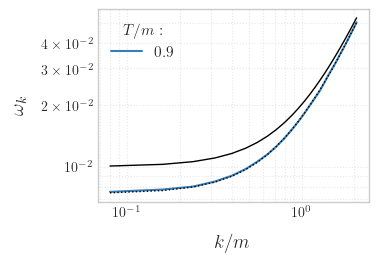

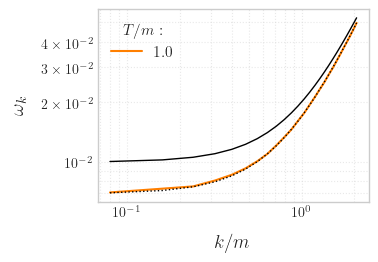

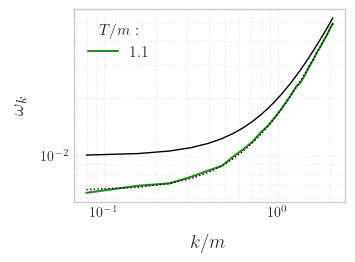

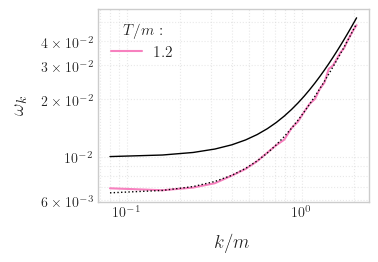

[0.08600098 0.0833747  0.08110965 0.0804103 ]


In [31]:
if True:
    savemeff = np.zeros((4))
    cls = cycle(allcolors[:4])
    for tmp in range(len(tempList)):
        if tmp==4: break
        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])

        # modes to plot:
        indmax = np.arange(len(klist))[(klist/np.sqrt(m2(lamb))>0.)&(klist/np.sqrt(m2(lamb))<=2.2)][-1]
        aa, bb = 1, indmax#knyq//5
        ta, tb = -50, -1
        
        ALL_powspec1 = np.load(powspec_tlist_file(*exp_params, minSim, 2000))
        tlist, PSfld1, PSmom1 = ALL_powspec1[0], ALL_powspec1[1][:, 0, ta:tb, aa:bb], ALL_powspec1[1][:, 1, ta:tb, aa:bb]
        del ALL_powspec1

        ALL_powspec2 = np.load(powspec_tlist_file(*exp_params, 2000, maxSim))
        tlist, PSfld2, PSmom2 = ALL_powspec2[0], ALL_powspec2[1][:, 0, ta:tb, aa:bb], ALL_powspec2[1][:, 1, ta:tb, aa:bb]
        del ALL_powspec2

        avPSfld = np.nanmean(np.nanmean(np.concatenate((PSfld1, PSfld2), axis=0), axis=1), axis=0)
        avPSmom = np.nanmean(np.nanmean(np.concatenate((PSmom1, PSmom2), axis=0), axis=1), axis=0)
        del PSfld1, PSfld2, PSmom1, PSmom2
        curve   = (avPSmom/avPSfld)

        w2m      = lambda ks, m: ks**2. + m**2.
        pofk     = lambda ks, m: w2m(ks, m)
        pred_fit = lambda x, data: sco.curve_fit(pofk, x, data, p0=0.09)[0]

        fig, ax = plt.subplots(1,1, figsize = (3.5,2.5))
        col = next(cls)
        #lab1 = r'$\rm Data$'
        lab1 = r'${:.1f}$'.format(temp/np.sqrt(m2(lamb)))
        plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), curve, ls='-', color=col, label=lab1)

        best_ps = pred_fit(klist[aa:bb], curve)
        savemeff[tmp] = best_ps[0]
     #   lab2 = r'$m_{\rm eff}=$'+r'${:.4f}$'.format(*best_ps)
        plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), pofk(klist[aa:bb], *best_ps), color='k', ls=':', lw=1)#, label=lab2)

        plt.legend(title=r'$T/m:$', loc=2, ncol=1, frameon=False)
        plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), pofk(klist[aa:bb], np.sqrt(m2(lamb))), ls='-', lw=1, color='k')#, lab=lab0)

        ax.grid(which='both', ls=':', color='lightgray', alpha=0.5)
        ax.tick_params(direction='in', which='both', top=True, right=True)
        ax.ticklabel_format(axis='both', style='scientific', scilimits=[0.,0.])
        ax.set_yscale('log')
        ax.set_xscale('log')
        #ax.set_ylabel(r'$\left\langle \left|\bar{\Pi}_k(t)\right|^2/\left|\bar{\varphi}_k(t)\right|^2 \right\rangle $')
        ax.set_ylabel(r'$\omega_k$')
        ax.set_xlabel(r'$k/m$')
        plt.show()

print(savemeff)

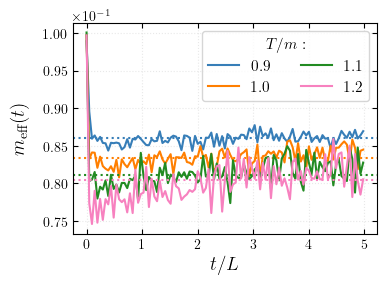

In [410]:
fig, ax = plt.subplots(1,1, figsize = (4,3))
cls = cycle(allcolors[:4])
for zi, stuff in enumerate(np.array(view_meff_func_t)):
    col = next(cls)
    plt.plot(stuff[:,0]*dx/lenLat, stuff[:,1], label=r'${:.1f}$'.format(tempList[zi]/np.sqrt(m2(lamb))), color=col)
    plt.axhline(savemeff[zi], color=col, ls=':')
plt.ylabel(r'$m_{\rm eff}(t)$')
plt.xlabel(r'$t/L$')
plt.legend(title=r'$T/m:$', ncol=2)

plt.grid(which='both', ls=':', color='lightgray', alpha=0.5)
plt.tick_params(direction='in', which='both', top=True, right=True)
plt.ticklabel_format(axis='both', style='scientific', scilimits=[0.,0.])
ax.xaxis.set_label_coords(0.5, -0.1)
plt.tight_layout()
plt.savefig('./plots/masses_tevol.pdf')
plt.show()

/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: Mean of empty slice


pcov [[3.56399901e-07]]


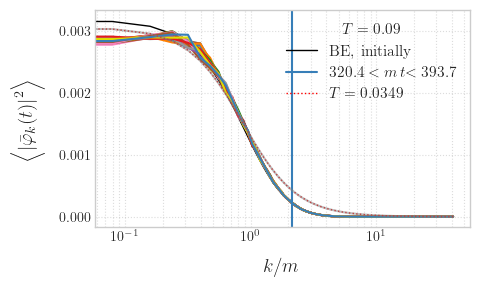

pcov [[2.72304853e-07]]


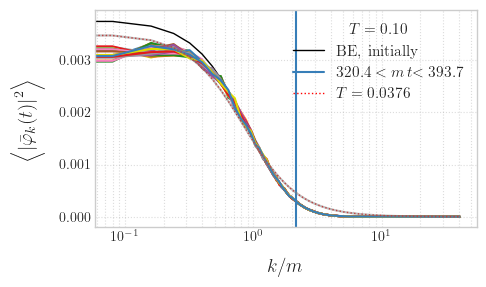

pcov [[3.21478081e-07]]


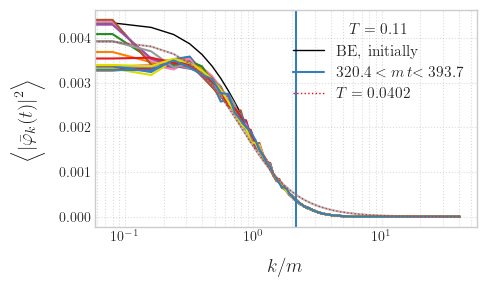

pcov [[5.56644106e-07]]


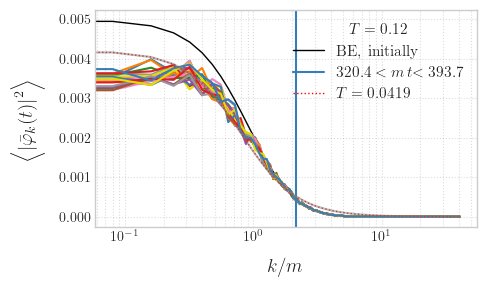

In [115]:
if True:
    norml    = 1./ phi0 / np.sqrt(2. * lenLat)
    w2m      = lambda ks, mm: ks**2. + mm**2.
    pofk0    = lambda ks, mm, te: norml / w2m(ks, mm)**0.25 * np.sqrt(2./(np.exp(w2m(ks, mm)**0.5/te) - 1.))
    pofk     = lambda ks, mm, te: norml / w2m(ks, mm)**0.25 * np.sqrt(2./(w2m(ks, mm)**0.5/te))
    #pofk     = lambda ks, mm, te: norml / w2m(ks, mm)**0.25 * np.sqrt(2. * (1. - w2m(ks, mm)**0.5/te))
    f_pred   = lambda ks, mm, te: np.abs(pofk(ks, mm, te))**2.
    f_pred1  = lambda ks, te: np.abs(pofk(ks, savemeff[tmp], te))**2.
    f_pred2  = lambda ks, te: np.abs(pofk0(ks, m2(lamb)**0.5, te))**2.
    pred_fit = lambda x, data: sco.curve_fit(f_pred1, x, data)

    save_teff_from_fld = np.zeros((4))
    for tmp in range(len(tempList)):
        if tmp==4: break
        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])

        # modes to plot:
        aa, bb = 0, knyq-1
        # time slices to average
        am, bm = -20, -1

        ALL_powspec1 = np.load(powspec_tlist_file(*exp_params, minSim, 2000))
        tlist, PSfld1 = ALL_powspec1[0], ALL_powspec1[1][:, 0, am:bm, aa:bb]
        del ALL_powspec1

        ALL_powspec2 = np.load(powspec_tlist_file(*exp_params, 2000, maxSim))
        tlist, PSfld2 = ALL_powspec2[0], ALL_powspec2[1][:, 0, am:bm, aa:bb]
        del ALL_powspec2

        PSfld = np.concatenate((PSfld1, PSfld2), axis=0)
        curve = np.nanmean(np.nanmean(PSfld, axis=1), axis=0)
        del PSfld1, PSfld2

        fig, ax = plt.subplots(1,1, figsize = (5.,3.))
        plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred2(klist[aa:bb], temp), color='k', lw=1, ls='-', label=r'$\rm BE, \; initially$')

        lab1 = r'${:.1f} < m\,t $'.format(round(tlist[am]*dx*np.sqrt(m2(lamb)),1)) + r'$< {:.1f}$'.format(round(tlist[bm]*dx*np.sqrt(m2(lamb)),1))
        [plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), ii, ls='-', label=(lab1 if i0==0 else None)) for i0, ii in enumerate(np.nanmean(PSfld, axis=0))]
        #plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), curve, ls='-', lw=2, label=lab1)

        indmax = np.arange(len(klist))[(klist/np.sqrt(m2(lamb))>0.)&(klist/np.sqrt(m2(lamb))<=2.2)][-1]
        cc, dd = 1, indmax
        best_ps, pcov = pred_fit(klist[cc:dd], curve[cc:dd])
        lab2 = r'$T={:.4f}$'.format(*best_ps)
        save_teff_from_fld[tmp] = best_ps[-1]
        plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred1(klist[aa:bb], *best_ps), color='r', lw=1, ls=':', label=lab2)
        plt.axvline(klist[indmax]/np.sqrt(m2(lamb)))
        print('pcov', pcov)
        plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred1(klist[aa:bb], *best_ps - pcov), alpha=0.3, color='gray')
        plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred1(klist[aa:bb], *best_ps + pcov), alpha=0.3, color='gray')

        leg = ax.legend(title=r'$T={:.2f}$'.format(temp), ncol=1, frameon=False, loc='best')
        ax.grid(which='both', color='darkgray', ls=':', alpha=0.4)
        ax.tick_params(direction='in', which='both', top=True, right=True)
        ax.set_xscale('log')
        ax.set_ylabel(r'$\left\langle \left|\bar{\varphi}_k(t)\right|^2 \right\rangle $')
        ax.set_xlabel(r'$k/m$')
        plt.tight_layout()
        #plt.savefig('./plots/powespec_tevol.pdf')
        plt.show()


In [15]:
if False:
    norml    = 1./ phi0 / np.sqrt(2. * lenLat)
    w2m      = lambda ks, msq: ks**2. + msq
    pofk0    = lambda ks, msq, te: norml * w2m(ks, msq)**0.25 * np.sqrt(2./(np.exp(w2m(ks, msq)**0.5/te) - 1.))
    pofk     = lambda ks, msq, te: norml * w2m(ks, msq)**0.25 * np.sqrt(2./(w2m(ks, msq)**0.5/te))
    #pofk     = lambda ks, msq, te: norml * w2m(ks, msq)**0.25 * np.sqrt(2. * (1. - w2m(ks, msq)**0.5/te))
    f_pred   = lambda ks, msq, te: np.abs(pofk(ks, msq, te))**2.
    f_pred1  = lambda ks, te: np.abs(pofk(ks, savemeff[tmp]**2., te))**2.
    f_pred2  = lambda ks, te: np.abs(pofk0(ks, m2(lamb), te))**2.
    pred_fit = lambda x, data: sco.curve_fit(f_pred1, x, data)

    save_teff_from_mom_upper_bound, save_teff_from_mom_lower_bound, save_teff_from_mom = np.zeros((3, 4))
    for tmp in range(len(tempList)):
        if tmp==4: break
        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])

        # modes to plot:
        aa, bb = 0, knyq-1
        # time slices to average
        am, bm = -50, -1

        ALL_powspec1 = np.load(powspec_tlist_file(*exp_params, minSim, 2000))
        tlist, PSfld1 = ALL_powspec1[0], ALL_powspec1[1][:, 1, am:bm, aa:bb]
        del ALL_powspec1
        ALL_powspec2 = np.load(powspec_tlist_file(*exp_params, 2000, maxSim))
        tlist, PSfld2 = ALL_powspec2[0], ALL_powspec2[1][:, 1, am:bm, aa:bb]
        del ALL_powspec2
        PSfld = np.concatenate((PSfld1, PSfld2), axis=0)
        curve = np.nanmean(np.nanmean(PSfld, axis=1), axis=0)
        del PSfld1, PSfld2

        fig, ax = plt.subplots(1,1, figsize = (5.,3.))
        #plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred2(klist[aa:bb], temp), color='k', lw=1, ls='-', label=r'$\rm BE, \; initially$')

        lab1 = r'${:.1f} < m\,t $'.format(round(tlist[am]*dx*np.sqrt(m2(lamb)),1)) + r'$< {:.1f}$'.format(round(tlist[bm]*dx*np.sqrt(m2(lamb)),1))
        [plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), ii, ls='-') for i0, ii in enumerate(np.nanmean(PSfld, axis=0))]
        plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), curve, ls='-', color='k', lw=2, label=lab1)

        indmax = np.arange(len(klist))[(klist/np.sqrt(m2(lamb))>0.)&(klist/np.sqrt(m2(lamb))<=2.2)][-1]
        cc, dd = 1, indmax
        print(cc, dd)
        best_ps, pcov = pred_fit(klist[cc:dd], curve[cc:dd])
        lab2 = r'$T={:.4f}$'.format(*best_ps)
        save_teff_from_mom[tmp] = best_ps[-1]
        plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred1(klist[aa:bb], *best_ps), color='r', lw=1, ls=':', label=lab2)
        plt.axvline(klist[indmax]/np.sqrt(m2(lamb)))
        plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred1(klist[aa:bb], *best_ps - pcov), alpha=0.3, color='gray')
        plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred1(klist[aa:bb], *best_ps + pcov), alpha=0.3, color='gray')

        cc, dd = 1, 2
        best_ps, _ = pred_fit(klist[cc:dd], curve[cc:dd])
        lab2 = r'$T={:.4f}$'.format(*best_ps)
        save_teff_from_mom_lower_bound[tmp] = best_ps[-1]
        plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred1(klist[aa:bb], *best_ps), color='r', lw=1, ls=':', label=lab2)
        plt.axhline(f_pred1(klist[indmax+1], save_teff_from_mom_lower_bound[tmp]))
        plt.axvline(klist[cc]/np.sqrt(m2(lamb)), color='k', ls=':')
        plt.axvline(klist[dd]/np.sqrt(m2(lamb)), color='k', ls=':')

        off = np.arange(len(klist))[(klist/np.sqrt(m2(lamb))>0.2)][0]
        indmax = off + np.argmax(curve[np.arange(len(klist))[(klist/np.sqrt(m2(lamb))>0.2)&(klist/np.sqrt(m2(lamb))<=2.2)]])
        cc, dd = indmax-1, indmax+2
        print(cc, dd)
        best_ps, _ = pred_fit(klist[cc:dd], curve[cc:dd])
        lab2 = r'$T={:.4f}$'.format(*best_ps)
        save_teff_from_mom_upper_bound[tmp] = best_ps[-1]
        plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred1(klist[aa:bb], *best_ps), color='r', lw=1, ls=':', label=lab2)
        plt.axhline(f_pred1(klist[indmax+1], save_teff_from_mom_upper_bound[tmp]))
        plt.axvline(klist[cc]/np.sqrt(m2(lamb)), color='k', ls='--')
        plt.axvline(klist[dd]/np.sqrt(m2(lamb)), color='k', ls='--')

        lab3 = r'$T={:.4f}$'.format(save_teff_from_fld[tmp])
        plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred1(klist[aa:bb], save_teff_from_fld[tmp]), color='g', lw=1, ls=':', label=lab3)

        leg = ax.legend(title=r'$T={:.2f}$'.format(temp), ncol=1, frameon=False, loc='best')
        ax.grid(which='both', color='darkgray', ls=':', alpha=0.4)
        ax.tick_params(direction='in', which='both', top=True, right=True)
        ax.set_xscale('log')
        ax.set_ylabel(r'$\left\langle \left|\bar{\Pi}_k(t)\right|^2 \right\rangle $')
        ax.set_xlabel(r'$k/m$')
        plt.tight_layout()
        #plt.savefig('./plots/powespec_tevol.pdf')
        plt.show()


In [16]:
#np.save('./data/best_fit_late_time_masses.npy', savemeff)
#np.save('./data/best_fit_all_masses.npy', view_meff_func_t)
#np.save('./data/best_fit_late_time_field_temperatures.npy', save_teff_from_fld)
#np.save('./data/best_fit_late_time_momentum_temperatures.npy', save_teff_from_mom)
#np.save('./data/best_fit_late_time_momentum_lower_bound_temperatures.npy', save_teff_from_mom_lower_bound)
#np.save('./data/best_fit_late_time_momentum_upper_bound_temperatures.npy', save_teff_from_mom_upper_bound)


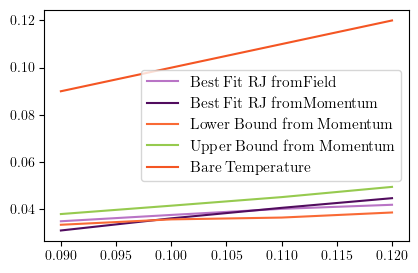

In [17]:
fig, ax = plt.subplots(1,1, figsize = (4.7,3.))
plt.plot(tempList[tmpList], save_teff_from_fld, label=r'$\rm Best \; Fit \; RJ \; from Field$')
plt.plot(tempList[tmpList], save_teff_from_mom, label=r'$\rm Best \; Fit \; RJ \; from Momentum$')
plt.plot(tempList[tmpList], save_teff_from_mom_lower_bound, label=r'$\rm Lower \; Bound \; from \; Momentum$')
plt.plot(tempList[tmpList], save_teff_from_mom_upper_bound, label=r'$\rm Upper \; Bound \; from \; Momentum$')
plt.plot(tempList[tmpList], tempList[tmpList], label=r'$\rm Bare \; Temperature$')
plt.legend()
plt.show()


/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: Mean of empty slice
/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice


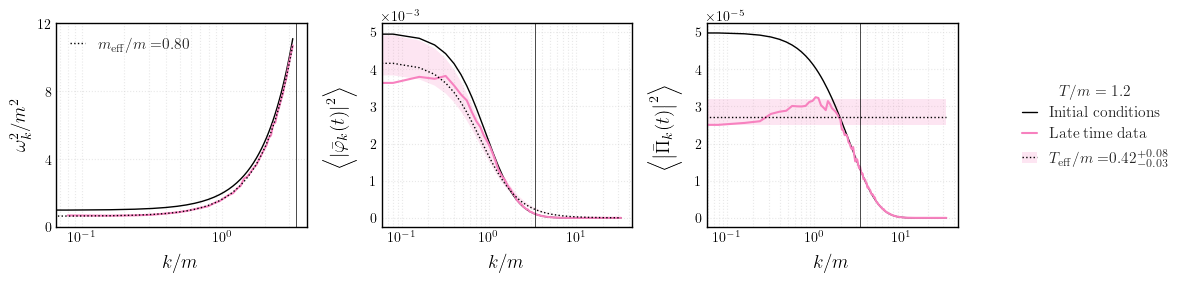

In [49]:
if True:
    fig, ax = plt.subplots(1, 4, figsize = (12,3.), gridspec_kw={'width_ratios': [2.,2.,2.,1.]})
    for tmp in range(len(tempList)):
        if tmp!=3: continue
        col = allcolors[tmp]
        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])

        indmax = np.arange(len(klist))[(klist/np.sqrt(m2(lamb))>0.)&(klist/np.sqrt(m2(lamb))<=3.3)][-1]
        # modes to plot:
        aa, bb = 0, indmax
        # time slices to average
        am, bm = -50, -1

        ALL_powspec1 = np.load(powspec_tlist_file(*exp_params, minSim, 2000))
        tlist, PSfld1, PSmom1 = ALL_powspec1[0], ALL_powspec1[1][:, 0, am:bm, aa:bb], ALL_powspec1[1][:, 1, am:bm, aa:bb]
        del ALL_powspec1
        ALL_powspec2 = np.load(powspec_tlist_file(*exp_params, 2000, maxSim))
        tlist, PSfld2, PSmom2 = ALL_powspec2[0], ALL_powspec2[1][:, 0, am:bm, aa:bb], ALL_powspec2[1][:, 1, am:bm, aa:bb]
        del ALL_powspec2

        avPSfld = np.nanmean(np.nanmean(np.concatenate((PSfld1, PSfld2), axis=0), axis=1), axis=0)
        avPSmom = np.nanmean(np.nanmean(np.concatenate((PSmom1, PSmom2), axis=0), axis=1), axis=0)
        del PSfld1, PSfld2, PSmom1, PSmom2
        curve   = (avPSmom/avPSfld)

        w2m     = lambda ks, m: ks**2. + m**2.
        pofk_w2 = lambda ks, m: w2m(ks, m)

        ax[0].plot(klist[aa:bb]/np.sqrt(m2(lamb)), pofk_w2(klist[aa:bb], np.sqrt(m2(lamb)))/m2(lamb), ls='-', lw=1, color='k')#, label=lab0)

        ax[0].plot(klist[aa:bb]/np.sqrt(m2(lamb)), curve/m2(lamb), ls='-', color=col)#, label=lab1)

        lab2 = r'$m_{\rm eff}/m=$'+r'${:.2f}$'.format(savemeff[tmp]/np.sqrt(m2(lamb))) + r'$\newline$'
        ax[0].plot(klist[aa:bb]/np.sqrt(m2(lamb)), pofk_w2(klist[aa:bb], savemeff[tmp])/m2(lamb), color='k', ls=':', lw=1, label=lab2)
        ax[0].legend(ncol=1, frameon=False, loc=2, handlelength=1)

        norml       = 1./ phi0 / np.sqrt(2. * lenLat)
        w2m_fld     = lambda ks, msq: ks**2. + msq
        pofk0_fld   = lambda ks, msq, te: norml / w2m_fld(ks, msq)**0.25 * np.sqrt(2./(np.exp(w2m_fld(ks, msq)**0.5/te) - 1.))
        pofk_fld    = lambda ks, msq, te: norml / w2m_fld(ks, msq)**0.25 * np.sqrt(2./(w2m_fld(ks, msq)**0.5/te))
        f_pred1_fld = lambda ks, te: np.abs(pofk_fld(ks, savemeff[tmp]**2., te))**2.
        f_pred2_fld = lambda ks, te: np.abs(pofk0_fld(ks, m2(lamb), te))**2.

        # modes to plot:
        aa, bb = 0, 10*indmax
        # time slices to average
        am, bm = -50, -1

        ALL_powspec1 = np.load(powspec_tlist_file(*exp_params, minSim, 2000))
        tlist, PSfld1 = ALL_powspec1[0], ALL_powspec1[1][:, :, am:bm, aa:bb]
        del ALL_powspec1
        ALL_powspec2 = np.load(powspec_tlist_file(*exp_params, 2000, maxSim))
        tlist, PSfld2 = ALL_powspec2[0], ALL_powspec2[1][:, :, am:bm, aa:bb]
        del ALL_powspec2
        curve_fld = np.nanmean(np.nanmean(np.concatenate((PSfld1[:,0], PSfld2[:,0]), axis=0), axis=1), axis=0)
        curve_mom = np.nanmean(np.nanmean(np.concatenate((PSfld1[:,1], PSfld2[:,1]), axis=0), axis=1), axis=0)
        del PSfld1, PSfld2

        ax[1].plot(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred2_fld(klist[aa:bb], temp), ls='-', lw=1, color='k')#, label=lab0)

        ax[1].plot(klist[aa:bb]/np.sqrt(m2(lamb)), curve_fld, ls='-', color=col)#, label=lab1)

        ax[1].fill_between(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred1_fld(klist[aa:bb], save_teff_from_mom_lower_bound[tmp]), \
                                                             f_pred1_fld(klist[aa:bb], save_teff_from_mom_upper_bound[tmp]), \
                                                             linewidth=0, color=col, alpha=0.2)
        ax[1].plot(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred1_fld(klist[aa:bb], save_teff_from_fld[tmp]), color='k', ls=':', lw=1)

        norml   = 1./ phi0 / np.sqrt(2. * lenLat)
        pofk0   = lambda ks, msq, te: norml * w2m_fld(ks, msq)**0.25 * np.sqrt(2./(np.exp(w2m_fld(ks, msq)**0.5/te) - 1.))
        pofk    = lambda ks, msq, te: norml * w2m_fld(ks, msq)**0.25 * np.sqrt(2./(w2m_fld(ks, msq)**0.5/te))
        f_pred1 = lambda ks, te: np.abs(pofk(ks, savemeff[tmp]**2., te))**2.
        f_pred2 = lambda ks, te: np.abs(pofk0(ks, m2(lamb), te))**2.

        ax[2].plot(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred2(klist[aa:bb], temp), ls='-', lw=1, color='k')#, label=lab0)

        ax[2].plot(klist[aa:bb]/np.sqrt(m2(lamb)), curve_mom, ls='-', color=col)#, label=lab1)

        ax[2].fill_between(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred1(klist[aa:bb], save_teff_from_mom_lower_bound[tmp]), \
                                                             f_pred1(klist[aa:bb], save_teff_from_mom_upper_bound[tmp]), \
                                                             linewidth=0, color=col, alpha=0.2)
        ax[2].plot(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred1(klist[aa:bb], save_teff_from_fld[tmp]), color='k', ls=':', lw=1)

        
        l0, = ax[3].plot(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred2(klist[aa:bb], temp), ls='-', lw=1, color='k')#, label=lab0)

        l1, = ax[3].plot(klist[aa:bb]/np.sqrt(m2(lamb)), curve_mom, ls='-', color=col)#, label=lab1)

        l2  = ax[3].fill_between(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred1(klist[aa:bb], save_teff_from_mom_lower_bound[tmp]), \
                                                                 f_pred1(klist[aa:bb], save_teff_from_mom_upper_bound[tmp]), \
                                 linewidth=0, color=col, alpha=0.2)
        l22,= ax[3].plot(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred1(klist[aa:bb], save_teff_from_fld[tmp]), color='k', ls=':', lw=1)

        lab0 = r'${\rm Initial \; conditions \;}$'
        lab1 = r'${\rm Late \; time \; data \;}$'
        lab2 = r'$T_{\rm eff}/m=$'+r'${:.2f}^{{+{:.2f}}}_{{-{:.2f}}}$'.format(save_teff_from_fld[tmp]/np.sqrt(m2(lamb)), \
                                     (save_teff_from_mom_upper_bound[tmp] - save_teff_from_fld[tmp])/np.sqrt(m2(lamb)), \
                                     (save_teff_from_fld[tmp] - save_teff_from_mom_lower_bound[tmp])/np.sqrt(m2(lamb)))
        leg = ax[3].legend([l0, l1, (l2, l22), ], [lab0, lab1, lab2], title=r'$T/m={:.1f}$'.format(temp/np.sqrt(m2(lamb))), \
                           ncol=1, frameon=False, handlelength=1, loc='center')

        ax[0].set_ylabel(r'$\omega_k^2/m^2$')
        ax[1].set_ylabel(r'$\left\langle \left|\bar{\varphi}_k(t)\right|^2 \right\rangle $')
        ax[2].set_ylabel(r'$\left\langle \left|\bar{\Pi}_k(t)\right|^2 \right\rangle $')

        for ai, aa in enumerate(ax.flatten()[:3]):
            aa.axvline(klist[indmax+1]/np.sqrt(m2(lamb)), color='k', ls='-', lw=0.5)
            aa.grid(which='both', ls=':', color='lightgray', alpha=0.5)
            aa.tick_params(direction='in', which='both', top=True, right=True)
            if ai>0:
                aa.ticklabel_format(axis='both', style='scientific', scilimits=[0.,0.])
            aa.set_xscale('log')
            #aa.set_ylabel(r'$\left\langle \left|\bar{\Pi}_k(t)\right|^2/\left|\bar{\varphi}_k(t)\right|^2 \right\rangle $')
            aa.set_xlabel(r'$k/m$')
            aa.xaxis.set_label_coords(0.5, -0.13)
            aa.yaxis.set_label_coords(-0.1, 0.5)
            aa.xaxis.label.set_color('k')        #setting up X-axis label color to yellow
            aa.yaxis.label.set_color('k')          #setting up Y-axis label color to blue
            aa.tick_params(axis='x', colors='k')    #setting up X-axis tick color to red
            aa.tick_params(axis='y', colors='k')  #setting up Y-axis tick color to black
            aa.spines['left'].set_color('k')        # setting up Y-axis tick color to red
            aa.spines['right'].set_color('k')        # setting up Y-axis tick color to red
            aa.spines['top'].set_color('k')         #setting up above X-axis tick color to red
            aa.spines['bottom'].set_color('k')         #setting up above X-axis tick color to red

        a = ax[0].get_yticks().tolist()[::2]
        ax[0].set_yticks(a)
        b = [r'${:.0f}$'.format(int(al)) for al in a]
        ax[0].set_yticklabels(b)

        ax[3].set_xlim(-1.1,-1.)
        ax[3].set_ylim(-1.1,-1.)
        ax[3].grid(which='both', ls=':', color='white')
        ax[3].tick_params(direction='in', which='both', top=None, right=None, bottom=None, left=None)
        ax[3].spines['top'].set_visible(False)
        ax[3].spines['right'].set_visible(False)
        ax[3].spines['bottom'].set_visible(False)
        ax[3].spines['left'].set_visible(False)
        ax[3].get_xaxis().set_ticks([])
        ax[3].get_yaxis().set_ticks([])

        plt.tight_layout()
        plt.savefig('./plots/flat_bestfit_masses.pdf')
        plt.show()


/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


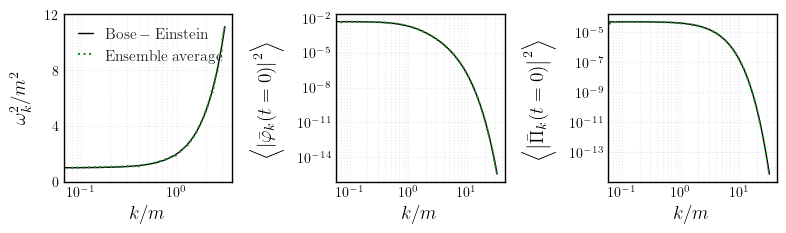

In [51]:
if True:
    fig, ax = plt.subplots(1, 3, figsize = (8,2.5))
    for tmp in range(len(tempList)):
        if tmp!=3: continue
        col = allcolors[2]
        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])

        indmax = np.arange(len(klist))[(klist/np.sqrt(m2(lamb))>0.)&(klist/np.sqrt(m2(lamb))<=3.3)][-1]
        # modes to plot:
        aa, bb = 0, indmax
        # time slices to average
        am, bm = 0, 1

        ALL_powspec1 = np.load(powspec_tlist_file(*exp_params, minSim, 2000))
        tlist, PSfld1, PSmom1 = ALL_powspec1[0], ALL_powspec1[1][:, 0, am:bm, aa:bb], ALL_powspec1[1][:, 1, am:bm, aa:bb]
        del ALL_powspec1
        ALL_powspec2 = np.load(powspec_tlist_file(*exp_params, 2000, maxSim))
        tlist, PSfld2, PSmom2 = ALL_powspec2[0], ALL_powspec2[1][:, 0, am:bm, aa:bb], ALL_powspec2[1][:, 1, am:bm, aa:bb]
        del ALL_powspec2

        avPSfld = np.nanmean(np.nanmean(np.concatenate((PSfld1, PSfld2), axis=0), axis=1), axis=0)
        avPSmom = np.nanmean(np.nanmean(np.concatenate((PSmom1, PSmom2), axis=0), axis=1), axis=0)
        del PSfld1, PSfld2, PSmom1, PSmom2
        curve   = (avPSmom/avPSfld)

        w2m     = lambda ks, m: ks**2. + m**2.
        pofk_w2 = lambda ks, m: w2m(ks, m)

        lab0 = r'$\rm Bose-Einstein$'
        ax[0].plot(klist[aa:bb]/np.sqrt(m2(lamb)), pofk_w2(klist[aa:bb], np.sqrt(m2(lamb)))/m2(lamb), ls='-', lw=1, color='k', label=lab0)

        lab1 = r'$\rm Ensemble \; average$'
        ax[0].plot(klist[aa:bb]/np.sqrt(m2(lamb)), curve/m2(lamb), ls=':', color=col, label=lab1)
        ax[0].legend(ncol=1, frameon=False, loc=2, handlelength=1)
        
        norml       = 1./ phi0 / np.sqrt(2. * lenLat)
        w2m_fld     = lambda ks, msq: ks**2. + msq
        pofk0_fld   = lambda ks, msq, te: norml / w2m_fld(ks, msq)**0.25 * np.sqrt(2./(np.exp(w2m_fld(ks, msq)**0.5/te) - 1.))
        pofk_fld    = lambda ks, msq, te: norml / w2m_fld(ks, msq)**0.25 * np.sqrt(2./(w2m_fld(ks, msq)**0.5/te))
        f_pred1_fld = lambda ks, te: np.abs(pofk_fld(ks, savemeff[tmp]**2., te))**2.
        f_pred2_fld = lambda ks, te: np.abs(pofk0_fld(ks, m2(lamb), te))**2.

        # modes to plot:
        aa, bb = 0, 10*indmax
        # time slices to average
        am, bm = 0, 1

        ALL_powspec1 = np.load(powspec_tlist_file(*exp_params, minSim, 2000))
        tlist, PSfld1 = ALL_powspec1[0], ALL_powspec1[1][:, :, am:bm, aa:bb]
        del ALL_powspec1
        ALL_powspec2 = np.load(powspec_tlist_file(*exp_params, 2000, maxSim))
        tlist, PSfld2 = ALL_powspec2[0], ALL_powspec2[1][:, :, am:bm, aa:bb]
        del ALL_powspec2
        curve_fld = np.nanmean(np.nanmean(np.concatenate((PSfld1[:,0], PSfld2[:,0]), axis=0), axis=1), axis=0)
        curve_mom = np.nanmean(np.nanmean(np.concatenate((PSfld1[:,1], PSfld2[:,1]), axis=0), axis=1), axis=0)
        del PSfld1, PSfld2

        ax[1].plot(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred2_fld(klist[aa:bb], temp), ls='-', lw=1, color='k')#, label=lab0)

        ax[1].plot(klist[aa:bb]/np.sqrt(m2(lamb)), curve_fld, ls=':', color=col)#, label=lab1)

        norml   = 1./ phi0 / np.sqrt(2. * lenLat)
        pofk0   = lambda ks, msq, te: norml * w2m_fld(ks, msq)**0.25 * np.sqrt(2./(np.exp(w2m_fld(ks, msq)**0.5/te) - 1.))
        pofk    = lambda ks, msq, te: norml * w2m_fld(ks, msq)**0.25 * np.sqrt(2./(w2m_fld(ks, msq)**0.5/te))
        f_pred1 = lambda ks, te: np.abs(pofk(ks, savemeff[tmp]**2., te))**2.
        f_pred2 = lambda ks, te: np.abs(pofk0(ks, m2(lamb), te))**2.

        ax[2].plot(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred2(klist[aa:bb], temp), ls='-', lw=1, color='k')#, label=lab0)

        ax[2].plot(klist[aa:bb]/np.sqrt(m2(lamb)), curve_mom, ls=':', color=col)#, label=lab1)

        ax[0].set_ylabel(r'$\omega_k^2/m^2$')
        ax[1].set_ylabel(r'$\left\langle \left|\bar{\varphi}_k(t=0)\right|^2 \right\rangle $')
        ax[2].set_ylabel(r'$\left\langle \left|\bar{\Pi}_k(t=0)\right|^2 \right\rangle $')

        for ai, aa in enumerate(ax):
            aa.grid(which='both', ls=':', color='lightgray', alpha=0.5)
            aa.tick_params(direction='in', which='both', top=True, right=True)
            if ai>0:
                aa.set_yscale('log')
                #aa.ticklabel_format(axis='both', style='scientific', scilimits=[0.,0.])
            aa.set_xscale('log')
            #aa.set_ylabel(r'$\left\langle \left|\bar{\Pi}_k(t)\right|^2/\left|\bar{\varphi}_k(t)\right|^2 \right\rangle $')
            aa.set_xlabel(r'$k/m$')
            aa.xaxis.set_label_coords(0.5, -0.13)
            #aa.yaxis.set_label_coords(-0.1, 0.5)
            aa.xaxis.label.set_color('k')
            aa.yaxis.label.set_color('k')
            aa.tick_params(axis='x', colors='k')
            aa.tick_params(axis='y', colors='k')
            aa.spines['left'].set_color('k')
            aa.spines['right'].set_color('k')
            aa.spines['top'].set_color('k')
            aa.spines['bottom'].set_color('k')

        a = ax[0].get_yticks().tolist()[::2]
        ax[0].set_yticks(a)
        b = [r'${:.0f}$'.format(int(al)) for al in a]
        ax[0].set_yticklabels(b)
        plt.tight_layout()
        plt.savefig('./plots/power_spectr_t0.pdf')
        plt.show()


/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: Mean of empty slice
/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice


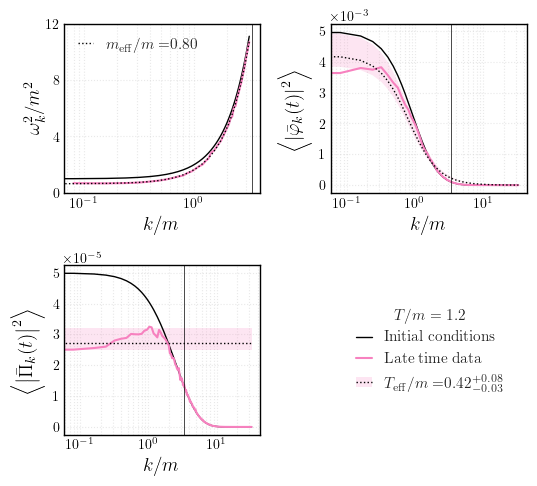

In [52]:
if True:
    fig, ax = plt.subplots(2, 2, figsize = (5.5,5.), gridspec_kw={'width_ratios': [2,2], 'height_ratios': [2,2]})
    for tmp in range(len(tempList)):
        if tmp!=3: continue
        col = allcolors[tmp]
        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])

        indmax = np.arange(len(klist))[(klist/np.sqrt(m2(lamb))>0.)&(klist/np.sqrt(m2(lamb))<=3.3)][-1]
        # modes to plot:
        aa, bb = 0, indmax
        # time slices to average
        am, bm = -50, -1

        ALL_powspec1 = np.load(powspec_tlist_file(*exp_params, minSim, 2000))
        tlist, PSfld1, PSmom1 = ALL_powspec1[0], ALL_powspec1[1][:, 0, am:bm, aa:bb], ALL_powspec1[1][:, 1, am:bm, aa:bb]
        del ALL_powspec1
        ALL_powspec2 = np.load(powspec_tlist_file(*exp_params, 2000, maxSim))
        tlist, PSfld2, PSmom2 = ALL_powspec2[0], ALL_powspec2[1][:, 0, am:bm, aa:bb], ALL_powspec2[1][:, 1, am:bm, aa:bb]
        del ALL_powspec2

        avPSfld = np.nanmean(np.nanmean(np.concatenate((PSfld1, PSfld2), axis=0), axis=1), axis=0)
        avPSmom = np.nanmean(np.nanmean(np.concatenate((PSmom1, PSmom2), axis=0), axis=1), axis=0)
        del PSfld1, PSfld2, PSmom1, PSmom2
        curve   = (avPSmom/avPSfld)

        w2m     = lambda ks, m: ks**2. + m**2.
        pofk_w2 = lambda ks, m: w2m(ks, m)

        ax[0,0].plot(klist[aa:bb]/np.sqrt(m2(lamb)), pofk_w2(klist[aa:bb], np.sqrt(m2(lamb)))/m2(lamb), ls='-', lw=1, color='k')#, label=lab0)

        ax[0,0].plot(klist[aa:bb]/np.sqrt(m2(lamb)), curve/m2(lamb), ls='-', color=col)#, label=lab1)

        lab2 = r'$m_{\rm eff}/m=$'+r'${:.2f}$'.format(savemeff[tmp]/np.sqrt(m2(lamb))) + r'$\newline$'
        ax[0,0].plot(klist[aa:bb]/np.sqrt(m2(lamb)), pofk_w2(klist[aa:bb], savemeff[tmp])/m2(lamb), color='k', ls=':', lw=1, label=lab2)
        ax[0,0].legend(ncol=1, frameon=False, loc=2, handlelength=1)

        norml       = 1./ phi0 / np.sqrt(2. * lenLat)
        w2m_fld     = lambda ks, msq: ks**2. + msq
        pofk0_fld   = lambda ks, msq, te: norml / w2m_fld(ks, msq)**0.25 * np.sqrt(2./(np.exp(w2m_fld(ks, msq)**0.5/te) - 1.))
        pofk_fld    = lambda ks, msq, te: norml / w2m_fld(ks, msq)**0.25 * np.sqrt(2./(w2m_fld(ks, msq)**0.5/te))
        f_pred1_fld = lambda ks, te: np.abs(pofk_fld(ks, savemeff[tmp]**2., te))**2.
        f_pred2_fld = lambda ks, te: np.abs(pofk0_fld(ks, m2(lamb), te))**2.

        # modes to plot:
        aa, bb = 0, 10*indmax
        # time slices to average
        am, bm = -50, -1

        ALL_powspec1 = np.load(powspec_tlist_file(*exp_params, minSim, 2000))
        tlist, PSfld1 = ALL_powspec1[0], ALL_powspec1[1][:, :, am:bm, aa:bb]
        del ALL_powspec1
        ALL_powspec2 = np.load(powspec_tlist_file(*exp_params, 2000, maxSim))
        tlist, PSfld2 = ALL_powspec2[0], ALL_powspec2[1][:, :, am:bm, aa:bb]
        del ALL_powspec2
        curve_fld = np.nanmean(np.nanmean(np.concatenate((PSfld1[:,0], PSfld2[:,0]), axis=0), axis=1), axis=0)
        curve_mom = np.nanmean(np.nanmean(np.concatenate((PSfld1[:,1], PSfld2[:,1]), axis=0), axis=1), axis=0)
        del PSfld1, PSfld2

        ax[0,1].plot(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred2_fld(klist[aa:bb], temp), ls='-', lw=1, color='k')#, label=lab0)

        ax[0,1].plot(klist[aa:bb]/np.sqrt(m2(lamb)), curve_fld, ls='-', color=col)#, label=lab1)

        ax[0,1].fill_between(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred1_fld(klist[aa:bb], save_teff_from_mom_lower_bound[tmp]), \
                                                             f_pred1_fld(klist[aa:bb], save_teff_from_mom_upper_bound[tmp]), \
                                                             linewidth=0, color=col, alpha=0.2)
        ax[0,1].plot(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred1_fld(klist[aa:bb], save_teff_from_fld[tmp]), color='k', ls=':', lw=1)

        norml   = 1./ phi0 / np.sqrt(2. * lenLat)
        pofk0   = lambda ks, msq, te: norml * w2m_fld(ks, msq)**0.25 * np.sqrt(2./(np.exp(w2m_fld(ks, msq)**0.5/te) - 1.))
        pofk    = lambda ks, msq, te: norml * w2m_fld(ks, msq)**0.25 * np.sqrt(2./(w2m_fld(ks, msq)**0.5/te))
        f_pred1 = lambda ks, te: np.abs(pofk(ks, savemeff[tmp]**2., te))**2.
        f_pred2 = lambda ks, te: np.abs(pofk0(ks, m2(lamb), te))**2.

        ax[1,0].plot(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred2(klist[aa:bb], temp), ls='-', lw=1, color='k')#, label=lab0)

        ax[1,0].plot(klist[aa:bb]/np.sqrt(m2(lamb)), curve_mom, ls='-', color=col)#, label=lab1)

        ax[1,0].fill_between(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred1(klist[aa:bb], save_teff_from_mom_lower_bound[tmp]), \
                                                             f_pred1(klist[aa:bb], save_teff_from_mom_upper_bound[tmp]), \
                                                             linewidth=0, color=col, alpha=0.2)
        ax[1,0].plot(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred1(klist[aa:bb], save_teff_from_fld[tmp]), color='k', ls=':', lw=1)

        
        l0, = ax[1,1].plot(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred2(klist[aa:bb], temp), ls='-', lw=1, color='k')#, label=lab0)

        l1, = ax[1,1].plot(klist[aa:bb]/np.sqrt(m2(lamb)), curve_mom, ls='-', color=col)#, label=lab1)

        l2  = ax[1,1].fill_between(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred1(klist[aa:bb], save_teff_from_mom_lower_bound[tmp]), \
                                                                 f_pred1(klist[aa:bb], save_teff_from_mom_upper_bound[tmp]), \
                                 linewidth=0, color=col, alpha=0.2)
        l22,= ax[1,1].plot(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred1(klist[aa:bb], save_teff_from_fld[tmp]), color='k', ls=':', lw=1)

        lab0 = r'${\rm Initial \; conditions \;}$'
        lab1 = r'${\rm Late \; time \; data \;}$'
        lab2 = r'$T_{\rm eff}/m=$'+r'${:.2f}^{{+{:.2f}}}_{{-{:.2f}}}$'.format(save_teff_from_fld[tmp]/np.sqrt(m2(lamb)), \
                                     (save_teff_from_mom_upper_bound[tmp] - save_teff_from_fld[tmp])/np.sqrt(m2(lamb)), \
                                     (save_teff_from_fld[tmp] - save_teff_from_mom_lower_bound[tmp])/np.sqrt(m2(lamb)))
        leg = ax[1,1].legend([l0, l1, (l2, l22), ], [lab0, lab1, lab2], title=r'$T/m={:.1f}$'.format(temp/np.sqrt(m2(lamb))), \
                           ncol=1, frameon=False, handlelength=1, loc='center')

        ax[0,0].set_ylabel(r'$\omega_k^2/m^2$')
        ax[0,1].set_ylabel(r'$\left\langle \left|\bar{\varphi}_k(t)\right|^2 \right\rangle $')
        ax[1,0].set_ylabel(r'$\left\langle \left|\bar{\Pi}_k(t)\right|^2 \right\rangle $')

        for ai, aa in enumerate(ax.flatten()[:3]):
            aa.axvline(klist[indmax+1]/np.sqrt(m2(lamb)), color='k', ls='-', lw=0.5)
            aa.grid(which='both', ls=':', color='lightgray', alpha=0.5)
            aa.tick_params(direction='in', which='both', top=True, right=True)
            if ai>0:
                aa.ticklabel_format(axis='both', style='scientific', scilimits=[0.,0.])
            aa.set_xscale('log')
            #aa.set_ylabel(r'$\left\langle \left|\bar{\Pi}_k(t)\right|^2/\left|\bar{\varphi}_k(t)\right|^2 \right\rangle $')
            aa.set_xlabel(r'$k/m$')
            aa.xaxis.set_label_coords(0.5, -0.13)
            aa.yaxis.set_label_coords(-0.1, 0.5)
            aa.xaxis.label.set_color('k')        #setting up X-axis label color to yellow
            aa.yaxis.label.set_color('k')          #setting up Y-axis label color to blue
            aa.tick_params(axis='x', colors='k')    #setting up X-axis tick color to red
            aa.tick_params(axis='y', colors='k')  #setting up Y-axis tick color to black
            aa.spines['left'].set_color('k')        # setting up Y-axis tick color to red
            aa.spines['top'].set_color('k')         #setting up above X-axis tick color to red
            aa.spines['right'].set_color('k')         #setting up above X-axis tick color to red
            aa.spines['bottom'].set_color('k')         #setting up above X-axis tick color to red

        a = ax[0,0].get_yticks().tolist()[::2]
        ax[0,0].set_yticks(a)
        b = [r'${:.0f}$'.format(int(al)) for al in a]
        ax[0,0].set_yticklabels(b)

        ax[1,1].set_xlim(-1.1,-1.)
        ax[1,1].set_ylim(-1.1,-1.)
        ax[1,1].grid(which='both', ls=':', color='white')
        ax[1,1].tick_params(direction='in', which='both', top=None, right=None, bottom=None, left=None)
        ax[1,1].spines['top'].set_visible(False)
        ax[1,1].spines['right'].set_visible(False)
        ax[1,1].spines['bottom'].set_visible(False)
        ax[1,1].spines['left'].set_visible(False)
        ax[1,1].get_xaxis().set_ticks([])
        ax[1,1].get_yaxis().set_ticks([])

        plt.tight_layout()
        plt.savefig('./plots/bestfit_masses.pdf')
        plt.show()


In [128]:
if False:
    norml    = 1./ phi0 / np.sqrt(2. * lenLat)
    w2m      = lambda ks, mm: ks**2. + mm**2.
    pofk0    = lambda ks, mm, te: norml / w2m(ks, mm)**0.25 * np.sqrt(2./(np.exp(w2m(ks, mm)**0.5/te) - 1.))
    pofk     = lambda ks, mm, te: norml / w2m(ks, mm)**0.25 * np.sqrt(2./(w2m(ks, mm)**0.5/te))
    f_pred2  = lambda ks, te: np.abs(pofk0(ks, m2(lamb)**0.5, te))**2.

    view_meff_func_t = np.array(view_meff_func_t)
    view_teff_func_t = []
    for tmp in range(len(tempList)):
        if tmp==4: break
        view_teff_func_t.append([])
        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])

        # modes to plot:
        aa, bb = 0, knyq-1
        # time slices to average
        tslist = np.arange(0,103,1)

        ALL_powspec1 = np.load(powspec_tlist_file(*exp_params, minSim, 2000))
        tlist, PSfld1 = ALL_powspec1[0][tslist], ALL_powspec1[1][:, 0, tslist, aa:bb]
        del ALL_powspec1
        ALL_powspec2 = np.load(powspec_tlist_file(*exp_params, 2000, maxSim))
        tlist, PSfld2 = ALL_powspec2[0][tslist], ALL_powspec2[1][:, 0, tslist, aa:bb]
        del ALL_powspec2

        fig, ax = plt.subplots(1,1, figsize = (5.,3.))

        indmax = np.arange(len(klist))[(klist/np.sqrt(m2(lamb))>0.)&(klist/np.sqrt(m2(lamb))<=3.3)][-1]
        cc, dd = 1, indmax
        plt.axvline(klist[indmax]/np.sqrt(m2(lamb)))

        plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred2(klist[aa:bb], temp), color='k', lw=1, ls='-', label=r'$\rm BE, \; initially$')
        for tind, tt in enumerate(tlist):
            curve = np.nanmean(np.concatenate((PSfld1[:,tind], PSfld2[:,tind]), axis=0), axis=0)

            #lab1 = r'$m\,t = {:.1f}$'.format(round(tt*dx*np.sqrt(m2(lamb)),1))
            plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), curve, ls='-')#, label=lab1)

            #tmind = np.argmin(np.abs(view_meff_func_t[0][:,0] - tt))
            tmind = tind#int(view_meff_func_t[0][tind,0])

            if tmind!=0:
                f_pred1  = lambda ks, te: np.abs(pofk(ks, view_meff_func_t[tmp][tmind,1], te))**2.
            else:
                f_pred1  = lambda ks, te: np.abs(pofk(ks, 0.1, te))**2.
            pred_fit = lambda x, data: sco.curve_fit(f_pred1, x, data)

            best_ps, pcov = pred_fit(klist[cc:dd], curve[cc:dd])

            #lab2 = r'$T={:.4f}$'.format(*best_ps)
            view_teff_func_t[tmp].append([tt, best_ps[0]])
            plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred1(klist[aa:bb], *best_ps), color='k', lw=1, ls=':')#, label=lab2)

        del PSfld1, PSfld2

        leg = ax.legend(title=r'$T={:.2f}$'.format(temp), ncol=1, frameon=False, loc='best')
        ax.grid(which='both', color='darkgray', ls=':', alpha=0.4)
        ax.tick_params(direction='in', which='both', top=True, right=True)
        ax.set_xscale('log')
        ax.set_ylabel(r'$\left\langle \left|\bar{\varphi}_k(t)\right|^2 \right\rangle $')
        ax.set_xlabel(r'$k/m$')
        plt.tight_layout()
        #plt.savefig('./plots/powespec_tevol.pdf')
        plt.show()


In [129]:
if False:
    norml    = 1./ phi0 / np.sqrt(2. * lenLat)
    w2m      = lambda ks, mm: ks**2. + mm**2.
    pofk0    = lambda ks, mm, te: norml * w2m(ks, mm)**0.25 * np.sqrt(2./(np.exp(w2m(ks, mm)**0.5/te) - 1.))
    pofk     = lambda ks, mm, te: norml * w2m(ks, mm)**0.25 * np.sqrt(2./(w2m(ks, mm)**0.5/te))
    f_pred   = lambda ks, mm, te: np.abs(pofk(ks, mm, te))**2.
    f_pred2  = lambda ks, te: np.abs(pofk0(ks, m2(lamb)**0.5, te))**2.
    pred_fit = lambda x, data: sco.curve_fit(f_pred1, x, data)

    view_teff_func_t_from_mom_upper_bound, view_teff_func_t_from_mom_lower_bound, view_teff_func_t_from_mom = [], [], []
    for tmp in range(len(tempList)):
        if tmp==4: break
        view_teff_func_t_from_mom_upper_bound.append([])
        view_teff_func_t_from_mom_lower_bound.append([])
        view_teff_func_t_from_mom.append([])
        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])

        # modes to plot:
        aa, bb = 0, knyq-1
        # time slices to average
        tslist = np.arange(0,103,1)

        ALL_powspec1 = np.load(powspec_tlist_file(*exp_params, minSim, 2000))
        tlist, PSfld1 = ALL_powspec1[0][tslist], ALL_powspec1[1][:, 1, tslist, aa:bb]
        del ALL_powspec1
        ALL_powspec2 = np.load(powspec_tlist_file(*exp_params, 2000, maxSim))
        tlist, PSfld2 = ALL_powspec2[0][tslist], ALL_powspec2[1][:, 1, tslist, aa:bb]
        del ALL_powspec2

        fig, ax = plt.subplots(1,1, figsize = (5.,3.))

        indmax = np.arange(len(klist))[(klist/np.sqrt(m2(lamb))>0.)&(klist/np.sqrt(m2(lamb))<=3.3)][-1]
        cc, dd = 1, indmax
        print(cc, dd)

        plt.axvline(klist[indmax]/np.sqrt(m2(lamb)))

        plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred2(klist[aa:bb], temp), color='k', lw=1, ls='-', label=r'$\rm BE, \; initially$')
        for tind, tt in enumerate(tlist):
            curve = np.nanmean(np.concatenate((PSfld1[:,tind], PSfld2[:,tind]), axis=0), axis=0)

            #lab1 = r'$m\,t = {:.1f}$'.format(round(tt*dx*np.sqrt(m2(lamb)),1))
            plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), curve, ls='-')#, label=lab1)

            #tmind = np.argmin(np.abs(view_meff_func_t[0][:,0] - tt))
            tmind = tind#int(view_meff_func_t[0][tind,0])

            if tmind!=0:
                f_pred1  = lambda ks, te: np.abs(pofk(ks, view_meff_func_t[tmp][tmind,1], te))**2.
            else:
                f_pred1  = lambda ks, te: np.abs(pofk(ks, 0.1, te))**2.
            best_ps, pcov = pred_fit(klist[cc:dd], curve[cc:dd])

            #lab2 = r'$T={:.4f}$'.format(*best_ps)
            view_teff_func_t_from_mom[tmp].append([tt, best_ps[0]])
            plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred1(klist[aa:bb], *best_ps), color='k', lw=1, ls=':')#, label=lab2)

            best_ps, _ = pred_fit(klist[1:2], curve[1:2])
            view_teff_func_t_from_mom_lower_bound[tmp].append([tt, best_ps[0]])
            plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred1(klist[aa:bb], *best_ps), color='g', lw=1, ls=':')

            off = np.arange(len(klist))[(klist/np.sqrt(m2(lamb))>0.2)][0]
            inddx = off + np.argmax(curve[np.arange(len(klist))[(klist/np.sqrt(m2(lamb))>0.2)&(klist/np.sqrt(m2(lamb))<=3.3)]])
            best_ps, _ = pred_fit(klist[inddx-1:inddx+2], curve[inddx-1:inddx+2])
            view_teff_func_t_from_mom_upper_bound[tmp].append([tt, best_ps[0]])
            plt.plot(klist[aa:bb]/np.sqrt(m2(lamb)), f_pred1(klist[aa:bb], *best_ps), color='b', lw=1, ls=':')

        del PSfld1, PSfld2

        leg = ax.legend(title=r'$T={:.2f}$'.format(temp), ncol=1, frameon=False, loc='best')
        ax.grid(which='both', color='darkgray', ls=':', alpha=0.4)
        ax.tick_params(direction='in', which='both', top=True, right=True)
        ax.set_xscale('log')
        ax.set_ylabel(r'$\left\langle \left|\bar{\Pi}_k(t)\right|^2 \right\rangle $')
        ax.set_xlabel(r'$k/m$')
        plt.tight_layout()
        #plt.savefig('./plots/powespec_tevol.pdf')
        plt.show()


In [122]:
#np.save('./data/best_fit_all_temperatures_from_momentum_upper_bound.npy', view_teff_func_t_from_mom_upper_bound)
#np.save('./data/best_fit_all_temperatures_from_momentum_lower_bound.npy', view_teff_func_t_from_mom_lower_bound)
#np.save('./data/best_fit_all_temperatures_from_momentum.npy', view_teff_func_t_from_mom)
#np.save('./data/best_fit_all_temperatures.npy', view_teff_func_t)


In [30]:
view_teff_func_t_from_mom_upper_bound = np.load('./data/best_fit_all_temperatures_from_momentum_upper_bound.npy')
view_teff_func_t_from_mom_lower_bound = np.load('./data/best_fit_all_temperatures_from_momentum_lower_bound.npy')
view_teff_func_t_from_mom = np.load('./data/best_fit_all_temperatures_from_momentum.npy')
view_teff_func_t = np.load('./data/best_fit_all_temperatures.npy')


In [31]:
allcolors = ['#377eb8', '#ff7f00', 'forestgreen', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']


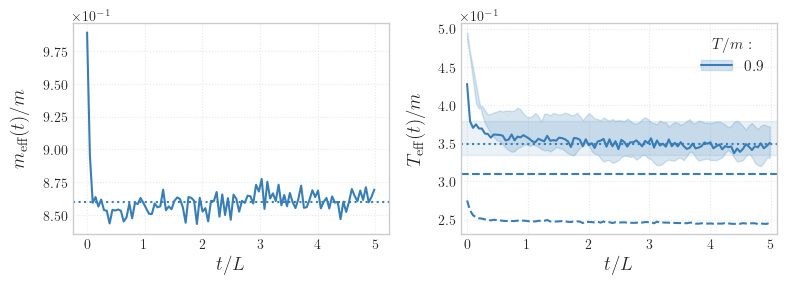

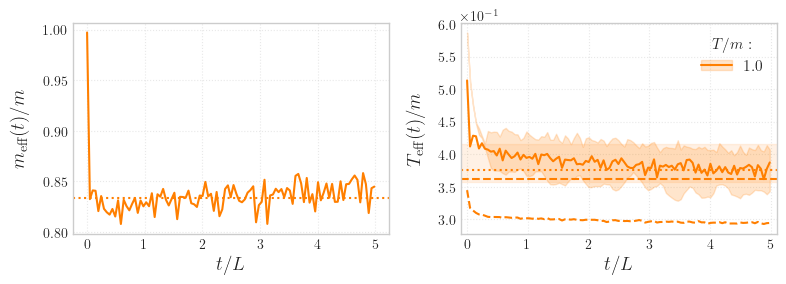

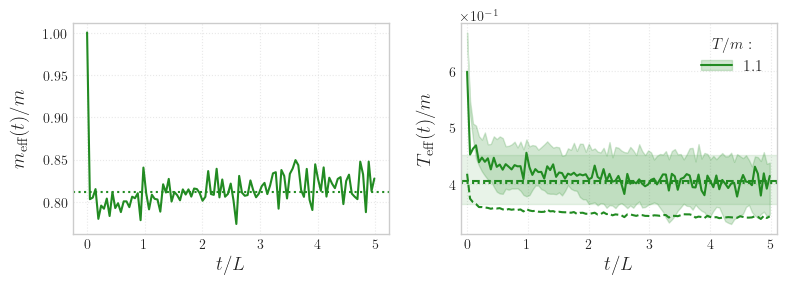

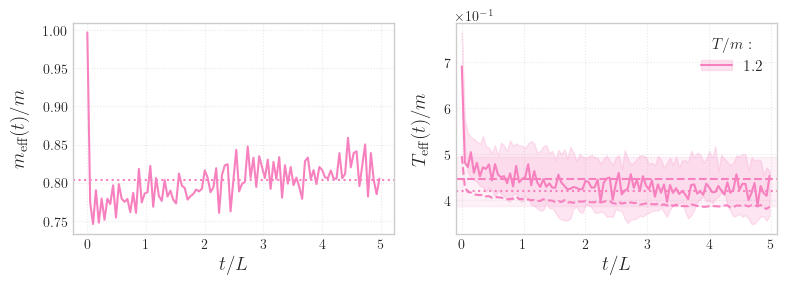

In [32]:
cls = cycle(allcolors[:4])
for zi, studd in enumerate(np.array(view_meff_func_t)):
    fig, ax = plt.subplots(1,2, figsize = (8,3))

    col = next(cls)
    ax[0].plot(studd[:,0]*dx/lenLat, studd[:,1]/np.sqrt(m2(lamb)), label=r'${:.1f}$'.format(tempList[zi]/np.sqrt(m2(lamb))), color=col)
    ax[0].axhline(savemeff[zi]/np.sqrt(m2(lamb)), color=col, ls=':')

    ax[1].fill_between(np.linspace(-1,6,len(studd[:,0])), save_teff_from_mom_lower_bound[zi]/np.sqrt(m2(lamb)), \
                                                          save_teff_from_mom_upper_bound[zi]/np.sqrt(m2(lamb)), color=col, alpha=0.1)

    stuff = view_teff_func_t[zi]
    stuee = view_teff_func_t_from_mom[zi]
    stugg = view_teff_func_t_from_mom_lower_bound[zi]
    stuhh = view_teff_func_t_from_mom_upper_bound[zi]
    l1 = ax[1].fill_between(stugg[:,0]*dx/lenLat, stugg[:,1]/np.sqrt(m2(lamb)), \
                                                  stuhh[:,1]/np.sqrt(m2(lamb)), color=col, alpha=0.2)

    labs = r'${:.1f}$'.format(tempList[zi]/np.sqrt(m2(lamb)))
    l2, = ax[1].plot(stuff[:,0]*dx/lenLat, stuff[:,1]/np.sqrt(m2(lamb)), color=col, ls='-')
    ax[1].plot(stuee[:,0]*dx/lenLat, stuee[:,1]/np.sqrt(m2(lamb)), color=col, ls='--')

    ax[1].axhline(save_teff_from_fld[zi]/np.sqrt(m2(lamb)), color=col, ls=':')
    ax[1].axhline(save_teff_from_mom[zi]/np.sqrt(m2(lamb)), color=col, ls='--')
  

    ax[0].set_ylabel(r'$m_{\rm eff}(t)/m$')
    ax[0].set_xlabel(r'$t/L$')
    #ax[0].legend(title=r'$T/m:$', ncol=2)

    ax[0].grid(which='both', ls=':', color='lightgray', alpha=0.5)
    ax[0].tick_params(direction='in', which='both', top=True, right=True)
    ax[0].ticklabel_format(axis='both', style='scientific', scilimits=[0.,0.])
    ax[0].xaxis.set_label_coords(0.5, -0.1)

    ax[1].set_xlim((-0.1, 5.1))
    ax[1].set_ylabel(r'$T_{\rm eff}(t)/m$')
    ax[1].set_xlabel(r'$t/L$')
    ax[1].legend([(l1,l2), ], [labs], title=r'$T/m:$', ncol=1, frameon=False)
    ax[1].grid(which='both', ls=':', color='lightgray', alpha=0.5)
    ax[1].tick_params(direction='in', which='both', top=True, right=True)
    ax[1].ticklabel_format(axis='both', style='scientific', scilimits=[0.,0.])
    ax[1].xaxis.set_label_coords(0.5, -0.1)
    plt.tight_layout()
    plt.show()


In [33]:
from matplotlib import pyplot

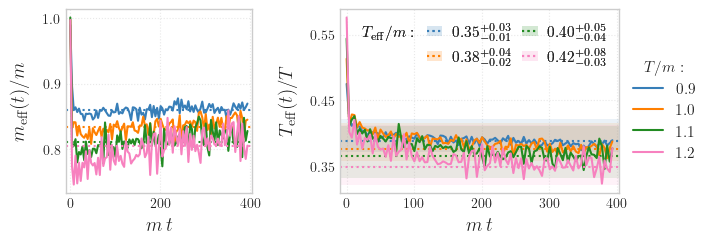

In [34]:
fig, ax = plt.subplots(1, 2, figsize = (6.5,2.6), gridspec_kw={'width_ratios': [1, 1.5]})

cls = cycle(allcolors[:4])
for zi, stuff in enumerate(view_meff_func_t):
    col = next(cls)

    lab = r'${:.1f}$'.format(tempList[zi]/np.sqrt(m2(lamb)))
    dat = stuff[:,1]/np.sqrt(m2(lamb))
    ax[0].plot(stuff[:,0]*dx*np.sqrt(m2(lamb)), dat, label=lab, color=col)
    
    ax[0].axhline(savemeff[zi]/np.sqrt(m2(lamb)), color=col, ls=':')

ax[0].set_ylabel(r'$m_{\rm eff}(t)/m$')
ax[0].set_xlabel(r'$m \, t$')
#ax[0].legend(title=r'$T/m:$', ncol=2)

ax[0].grid(which='both', ls=':', color='lightgray', alpha=0.5)
ax[0].tick_params(direction='in', which='both', top=True, right=True)
#ax[0].ticklabel_format(axis='both', style='scientific', scilimits=[0.,0.])

cls = cycle(allcolors[:4])
l1, labs, l2, labs1, l3, l4 = [], [], [], [], [], []
for zi, stuff in enumerate(view_teff_func_t):
    col = next(cls)

    stugg = view_teff_func_t_from_mom_lower_bound[zi]
    stuhh = view_teff_func_t_from_mom_upper_bound[zi]
  #  ll2s = ax[1].fill_between(stugg[:,0]*dx*np.sqrt(m2(lamb)), stugg[:,1]/np.sqrt(m2(lamb)), \
  #                                                             stuhh[:,1]/np.sqrt(m2(lamb)), lw=0, color=col, alpha=0.2)

  #  ax[1].axhline(save_teff_from_fld[zi], color=col, ls=':')
  #  ax[1].axhline(save_teff_from_mom[zi], color=col, ls=':')
  #  ll2s = ax[1].fill_between(np.linspace(-10, 10+studd[-1,0]*dx*np.sqrt(m2(lamb)),len(studd[:,0])), \
  #                            save_teff_from_mom_lower_bound[zi]/tempList[zi], \
  #                            save_teff_from_mom_upper_bound[zi]/tempList[zi], lw=0, color=col, alpha=0.1)
  #  l1.append(ll2s)


cls = cycle(allcolors[:4])
off_data_temp, alpha_list = [], []
for zi, stuff in enumerate(view_teff_func_t):
    col = next(cls)

    labs.append(r'${:.1f}$'.format(tempList[zi]/np.sqrt(m2(lamb))))
    
    off_data_temp.append(tempList[zi] - stuff[0,1])
  #  stuff[0,1] += off_data_temp[zi]

    dat = stuff[:,1]/tempList[zi]

    ll2s, = ax[1].plot(stuff[:,0]*dx*np.sqrt(m2(lamb)), dat, color=col, ls='-')
    l2.append(ll2s)

    labs1.append(r'${:.2f}^{{+{:.2f}}}_{{-{:.2f}}}$'.format(save_teff_from_fld[zi]/np.sqrt(m2(lamb)), \
                                     (save_teff_from_mom_upper_bound[zi] - save_teff_from_fld[zi])/np.sqrt(m2(lamb)), \
                                     (save_teff_from_fld[zi] - save_teff_from_mom_lower_bound[zi])/np.sqrt(m2(lamb))))

    alpha_list.append(save_teff_from_fld[zi]/tempList[zi])
    ll1s = ax[1].axhline(save_teff_from_fld[zi]/tempList[zi], color=col, ls=':')
    l3.append(ll1s)

    l4g = ax[1].fill_between(np.linspace(-10, 10+stuff[-1,0]*dx*np.sqrt(m2(lamb)),len(stuff[:,0])), \
                              save_teff_from_mom_lower_bound[zi]/tempList[zi], \
                              save_teff_from_mom_upper_bound[zi]/tempList[zi], lw=0, color=col, alpha=0.1)
    l4.append(l4g)

    studd = view_teff_func_t_from_mom[zi]
  #  ax[1].plot(studd[:,0]*dx*np.sqrt(m2(lamb)), studd[:,1], color=col, ls='--')

ax[0].set_xlim(-10, 10+studd[-1,0]*dx*np.sqrt(m2(lamb)))
ax[1].set_xlim(-10, 10+studd[-1,0]*dx*np.sqrt(m2(lamb)))

#ax[0].set_ylim(0.75,0.9)
#ax[1].set_ylim(0.32,0.55)

ax[1].set_ylabel(r'$T_{\rm eff}(t)/T$')
ax[1].set_xlabel(r'$m \, t$')
#ax[1].legend([(l1[0],l2[0]), (l1[1],l2[1]), (l1[2],l2[2]), (l1[3],l2[3]), ], \
#             labs, title=r'$T/m:$', ncol=1, frameon=False, bbox_to_anchor=(1, 0.8))
leg1 = pyplot.legend([(l2[0]), (l2[1]), (l2[2]), (l2[3]), ], \
             labs, title=r'$T/m:$', ncol=1, frameon=False, bbox_to_anchor=(1, 0.8))
ax[1].add_artist(leg1)


#leg0 = pyplot.legend(l3, labs1, title=r'$\alpha$', ncol=1, frameon=False)

handles = [plt.plot([],marker="", ls="")[0]]*2 + [(l3[0], l4[0]), (l3[1], l4[1]), (l3[2], l4[2]), (l3[3], l4[3]),]
labels = [r'$T_{\rm eff}/m:$',''] + labs1  # Merging labels
leg0 = pyplot.legend(handles, labels, handlelength=1, ncol=3, frameon=False, loc='upper right', columnspacing=0.8)#, markerfirst=False)

for vpack in leg0._legend_handle_box.get_children()[:1]:
    for hpack in vpack.get_children():
        for ii in hpack.get_children():
            ii.set_width(-10)
for vpack in leg0._legend_handle_box.get_children()[1:]:
    for hpack in vpack.get_children():
        for ii in hpack.get_children():
            ii.set_width(9)
ax[1].add_artist(leg0)

a = ax[0].get_yticks().tolist()[1:-1:2]
a = [round(al,1) for al in a]
ax[0].set_yticks(a)
b = [r'${:.1f}$'.format(al) for al in a]
ax[0].set_yticklabels(b)

a = ax[1].get_yticks().tolist()[1:-1:2]
a = [round(al,2) for al in a]
ax[1].set_yticks(a)
b = [r'${:.2f}$'.format(al) for al in a]
ax[1].set_yticklabels(b)

ax[1].grid(which='both', ls=':', color='lightgray', alpha=0.5)
ax[1].tick_params(direction='in', which='both', top=True, right=True)
#ax[1].ticklabel_format(axis='both', style='scientific', scilimits=[0.,0.])
ax[1].xaxis.set_label_coords(0.5, -0.13)
ax[0].xaxis.set_label_coords(0.5, -0.13)
plt.tight_layout()
plt.savefig('./plots/mass_teff_tevol.pdf')
plt.show()


In [35]:
alpha_list

[0.38775504411945777,
 0.3758266599051223,
 0.3650751819415298,
 0.34905989319650543]

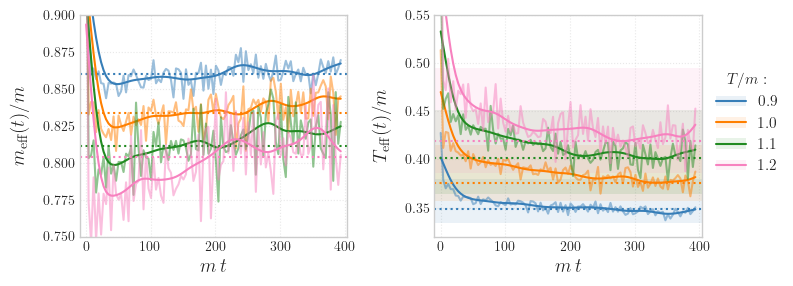

In [36]:
fig, ax = plt.subplots(1,2, figsize = (8,3))

cls = cycle(allcolors[:4])
for zi, stuff in enumerate(view_meff_func_t):
    col = next(cls)

    lab = r'${:.1f}$'.format(tempList[zi]/np.sqrt(m2(lamb)))
    dat = stuff[:,1]/np.sqrt(m2(lamb))
    ax[0].plot(stuff[:,0]*dx*np.sqrt(m2(lamb)), dat, alpha=0.5, label=lab, color=col)
    
    dat = gaussian_filter1d(dat, 4, mode='nearest')
    ax[0].plot(stuff[:,0]*dx*np.sqrt(m2(lamb)), dat, color=col)
    
    ax[0].axhline(savemeff[zi]/np.sqrt(m2(lamb)), color=col, ls=':')

ax[0].set_ylabel(r'$m_{\rm eff}(t)/m$')
ax[0].set_xlabel(r'$m \, t$')
#ax[0].legend(title=r'$T/m:$', ncol=2)

ax[0].grid(which='both', ls=':', color='lightgray', alpha=0.5)
ax[0].tick_params(direction='in', which='both', top=True, right=True)
#ax[0].ticklabel_format(axis='both', style='scientific', scilimits=[0.,0.])
ax[0].xaxis.set_label_coords(0.5, -0.1)

cls = cycle(allcolors[:4])
l1, labs, l2 = [], [], []
for zi, stuff in enumerate(view_teff_func_t):
    col = next(cls)

    stugg = view_teff_func_t_from_mom_lower_bound[zi]
    stuhh = view_teff_func_t_from_mom_upper_bound[zi]
  #  ll2s = ax[1].fill_between(stugg[:,0]*dx*np.sqrt(m2(lamb)), stugg[:,1]/np.sqrt(m2(lamb)), \
  #                                                             stuhh[:,1]/np.sqrt(m2(lamb)), lw=0, color=col, alpha=0.2)

  #  ax[1].axhline(save_teff_from_fld[zi], color=col, ls=':')
  #  ax[1].axhline(save_teff_from_mom[zi], color=col, ls=':')
    ll2s = ax[1].fill_between(np.linspace(-10, 10+studd[-1,0]*dx*np.sqrt(m2(lamb)),len(studd[:,0])), \
                              save_teff_from_mom_lower_bound[zi]/np.sqrt(m2(lamb)), \
                              save_teff_from_mom_upper_bound[zi]/np.sqrt(m2(lamb)), lw=0, color=col, alpha=0.1)
    l1.append(ll2s)


cls = cycle(allcolors[:4])
for zi, stuff in enumerate(view_teff_func_t):
    col = next(cls)

    labs.append(r'${:.1f}$'.format(tempList[zi]/np.sqrt(m2(lamb))))
    dat = stuff[:,1]/np.sqrt(m2(lamb))
    ax[1].plot(stuff[:,0]*dx*np.sqrt(m2(lamb)), dat, alpha=0.5, color=col, ls='-')

    dat = gaussian_filter1d(dat, 4, mode='nearest')
    ll2s, = ax[1].plot(stuff[:,0]*dx*np.sqrt(m2(lamb)), dat, color=col, ls='-')
    l2.append(ll2s)

    ax[1].axhline(save_teff_from_fld[zi]/np.sqrt(m2(lamb)), color=col, ls=':')
  
    #  studd = view_teff_func_t_from_mom[zi]
  #  ax[1].plot(studd[:,0]*dx*np.sqrt(m2(lamb)), studd[:,1], color=col, ls='--')

ax[0].set_xlim(-10, 10+studd[-1,0]*dx*np.sqrt(m2(lamb)))
ax[1].set_xlim(-10, 10+studd[-1,0]*dx*np.sqrt(m2(lamb)))

ax[0].set_ylim(0.75,0.9)
ax[1].set_ylim(0.32,0.55)

ax[1].set_ylabel(r'$T_{\rm eff}(t)/m$')
ax[1].set_xlabel(r'$m \, t$')
ax[1].legend([(l1[0],l2[0]), (l1[1],l2[1]), (l1[2],l2[2]), (l1[3],l2[3]), ], \
             labs, title=r'$T/m:$', ncol=1, frameon=False, bbox_to_anchor=(1, 0.8))
ax[1].grid(which='both', ls=':', color='lightgray', alpha=0.5)
ax[1].tick_params(direction='in', which='both', top=True, right=True)
#ax[1].ticklabel_format(axis='both', style='scientific', scilimits=[0.,0.])
ax[1].xaxis.set_label_coords(0.5, -0.1)
plt.tight_layout()
plt.savefig('./plots/mass_teff_tevol.pdf')
plt.show()


In [37]:
np.sqrt(4*nu*((4.*lamb**2.-1.)*sigmafld**2./phi0**2./2.))

0.0457534489165194

In [38]:
ecrit = np.zeros((len(tmpList)))
for ii, average_bubble in enumerate(reversed(bubbleList)):
    tmp = tmpList[ii]
    phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
    exp_params = np.asarray([nLat, lamb, phi0, temp])

    diffen = dx*phi0**2.

    instanton  = instantonList[tmp]
    gradinst   = (np.roll(instanton,-1) - instanton)/dx
    ecrit[tmp] = diffen * np.sum(0.5*gradinst**2. + V(instanton, lamb) - V(phieq,lamb))

def exp_bounce(x, a, b):
    return a * np.sqrt(b/x) * np.exp(-b/x)

def second_exp_bounce(x, a, b):
    Ecrit  = ecrit[0]
    Teff   = x*b
    return a * np.sqrt(Ecrit/Teff) * np.exp(-Ecrit/Teff)

def exp_prefactor(x, a):
    Ecrit = ecrit[0]
    return a * np.sqrt(Ecrit/x) * np.exp(-Ecrit/x)

get_best_bounce        = lambda x, y: sco.curve_fit(exp_bounce, x, y)
get_best_prefactor     = lambda x, y: sco.curve_fit(exp_prefactor, x, y)
get_second_best_bounce = lambda x, y: sco.curve_fit(second_exp_bounce, x, y)


In [39]:
lmmax, lmmin = 5*nLat, 2*nLat#2*nLat/3


[2.19519776]


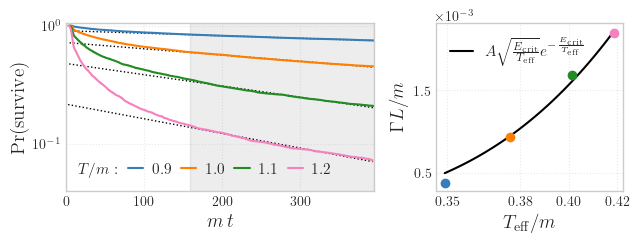

In [40]:
fig, ax = plt.subplots(1, 2, figsize = (6.5,2.6), gridspec_kw={'width_ratios': [3.8, 2.3]})
gammas1 = np.zeros((len(tempList), 2))
cls = cycle(allcolors[:4])

for tmp in range(len(tempList[:4])):
    phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
    exp_params = np.asarray([nLat, lamb, phi0, temp])
    labss = r'${}$'.format(round(temp/np.sqrt(m2(lamb)),1))

    decay_times = np.load(decay_times_file(*exp_params, minSim, maxSim, nTimeMAX))
    ndcys = maxSim - minSim
    decay_times = np.sort(decay_times[:,1])
    decay_times = decay_times[decay_times < lmmax]

    ax[0].fill_betweenx(np.linspace(-1,2,10), lmmin*dx*np.sqrt(m2(lamb)), lmmax*dx*np.sqrt(m2(lamb)), color='darkgray', alpha=0.05)

    frmin = [np.argmin(np.abs(decay_times - lmmax))]
    frmax = [np.argmin(np.abs(decay_times - lmmin))]
    frmin = survive_prob(decay_times, ndcys)[frmin]
    frmax = survive_prob(decay_times, ndcys)[frmax]

    tmin = decay_times[np.argmin(np.abs(survive_prob(decay_times, ndcys) - frmax))]
    tmax = decay_times[np.argmin(np.abs(survive_prob(decay_times, ndcys) - frmin))]
    jfit_times   = lin_fit_times(decay_times, ndcys, tmin, tmax)
    gammas1[tmp] = np.array([temp, -jfit_times[0]])

    col = next(cls)
    ax[0].plot(decay_times*dx*np.sqrt(m2(lamb)), np.exp(get_line(decay_times, *jfit_times)), ls=':', lw=1, color='k')
    ax[0].plot(decay_times*dx*np.sqrt(m2(lamb)), survive_prob(decay_times, ndcys), color=col, ls='-', label=labss)

temprange = np.linspace(save_teff_from_fld[0], save_teff_from_fld[3], 50)

prefactorA, _ = get_best_prefactor(save_teff_from_fld[:4], gammas1[:4,1]/np.sqrt(m2(lamb)))
ax[1].plot(temprange/np.sqrt(m2(lamb)), exp_prefactor(temprange, *prefactorA), \
           color='k', label=r'$A \sqrt{\frac{E_{\rm crit}}{T_{\rm eff}}} e^{-\frac{E_{\rm crit}}{T_{\rm eff}}}$')
print(prefactorA)

cls = cycle(allcolors[:4])
for tmp in range(len(tempList)):
    if tmp>3: break
    phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
    exp_params = np.asarray([nLat, lamb, phi0, temp])

    col = next(cls)
    ax[1].plot(save_teff_from_fld[tmp]/np.sqrt(m2(lamb)), gammas1[tmp,1]/np.sqrt(m2(lamb)), color=col, marker='o', linestyle='none')

ax[0].set_yscale('log')
#ax[0].ticklabel_format(axis='both', scilimits=[-5,5.])
ax[0].set_xlim(0, lmmax*dx*np.sqrt(m2(lamb)))
ax[0].set_ylim(4e-2, 1.05)
ax[0].set_ylabel(r'$\rm Pr(survive)$')
ax[0].set_xlabel(r'$m \, t$')
ax[0].xaxis.set_label_coords(0.5, -0.13)
ax[0].yaxis.set_label_coords(-0.12, 0.5)

h, l = ax[0].get_legend_handles_labels() # Extracting handles and labels
handles = [plt.plot([],marker="", ls="")[0]] + h
labels = [r'$T/m:$'] + l  # Merging labels
leg = ax[0].legend(handles, labels, handlelength=1, ncol=5, frameon=False, loc='lower left', labelspacing=0.3, columnspacing=0.6)#, markerfirst=False)
ax[0].grid(True, ls=':', color='lightgray', alpha=0.5)
ax[0].tick_params(direction='in', which='both', top=True, right=True)

for vpack in leg._legend_handle_box.get_children()[:1]:
    for hpack in vpack.get_children():
        for ii in hpack.get_children():
            ii.set_width(-10)
for vpack in leg._legend_handle_box.get_children()[1:]:
    for hpack in vpack.get_children():
        for ii in hpack.get_children():
            ii.set_width(9)

a = [round(ii,2) for ii in save_teff_from_fld[:4]/np.sqrt(m2(lamb))]
ax[1].set_xticks(a)

a = ax[1].get_yticks()[1:-1:2]
a = [round(al,8) for al in a]
ax[1].set_yticks(a)

for ai, aa in enumerate(ax[1:]):
    aa.set_ylabel(r'$\Gamma L / m$')
    aa.set_xlabel([r'$T_{\rm eff}/m$'][ai])
    aa.legend(loc=2, handlelength=1.5, frameon=False)
    aa.grid(True, ls=':', color='lightgray', alpha=0.5)
    aa.tick_params(direction='in', which='both', top=True, right=True)
    aa.ticklabel_format(axis='y', style='scientific', scilimits=[-1.,0.])
    aa.xaxis.set_label_coords(0.5, -0.13)
    aa.yaxis.set_label_coords(-0.15, 0.5)

fig.tight_layout()
plt.savefig('./plots/decay_rate_and_surv_fraction.pdf')
plt.show()

In [41]:
def get_stuffs(nsets):
    partdat = np.zeros((len(tmpList), nsets))
    for ii, average_bubble in enumerate(bubbleList):
        tmp = tmpList[ii]
        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])

        veldata = np.array(np.load(velocities_file(*exp_params)))
        simvels, all_vels = veldata[:,0].astype(int), veldata[:,1]

        pool = set(all_vels)
        means, vars = np.empty(nsets), np.empty(nsets)
        slen = int(round(len(pool) / nsets,1))
        for ss in range(nsets):
            velssec = random.sample(pool, slen)
            pool -= set(velssec)
            velssec = np.array(velssec)
            partdat[tmp,ss] = np.std(velssec)
    return partdat

ecrit, esph, char_vels = np.zeros((3, len(tmpList)))
for ii, average_bubble in enumerate(reversed(bubbleList)):
    tmp = tmpList[ii]
    phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
    exp_params = np.asarray([nLat, lamb, phi0, temp])

    veldata = np.array(np.load(velocities_file(*exp_params)))
    simvels, all_vels = veldata[:,0], veldata[:,1]
    
    char_vels[tmp] = np.std(all_vels)

    diffen = dx*phi0**2.

    instanton  = instantonList[tmp]
    gradinst   = (np.roll(instanton,-1) - instanton)/dx
    ecrit[tmp] = diffen * np.sum(0.5*gradinst**2. + V(instanton, lamb) - V(phieq,lamb))

    esph[tmp]  = diffen * encritList[tmp]


sigma_avbub = save_teff_from_fld / esph
sigma_crit  = save_teff_from_fld / ecrit


In [42]:
try:
    print(partdat[:,0])
except:
    partdat = get_stuffs(15)
    veldistrib_error = np.std(partdat, axis=-1)


In [88]:
partdat = np.array([[0.2663651 , 0.26288023, 0.24827217, 0.28949971, 0.28007232,
        0.27215081, 0.31169232, 0.2730204 , 0.27138849, 0.29183324,
        0.2849265 , 0.2698232 , 0.31877982, 0.27754504, 0.2983681 ],
       [0.28653241, 0.28648596, 0.29716205, 0.28732181, 0.31216922,
        0.2667568 , 0.30984471, 0.28128068, 0.27900381, 0.26490107,
        0.27768568, 0.31602303, 0.32605193, 0.30054873, 0.3036245 ],
       [0.34656528, 0.32199918, 0.33177073, 0.31857797, 0.33377343,
        0.29323235, 0.32190554, 0.30481143, 0.32158928, 0.33989714,
        0.33218029, 0.29930115, 0.30811727, 0.33134266, 0.30567538],
       [0.3771145 , 0.32451936, 0.33467314, 0.3103133 , 0.31165323,
        0.37017278, 0.36934681, 0.34298598, 0.34084556, 0.38827285,
        0.33431073, 0.3114242 , 0.32619812, 0.32439715, 0.31990531]])

In [89]:
veldistrib_error = np.array([0.01800283, 0.01755637, 0.01512923, 0.0246519 ])

In [90]:
percentage_error = veldistrib_error * 100. / char_vels**2.
inv_veldistrib_error = percentage_error * (1./np.array(char_vels)**2.) / 100.

asymmetric_error = np.array([save_teff_from_fld - save_teff_from_mom_lower_bound, \
                             save_teff_from_mom_upper_bound - save_teff_from_fld])
percentage_asymmetric_error = asymmetric_error * 100. / save_teff_from_fld
inverse_asymmetric_error = percentage_asymmetric_error * (1./save_teff_from_fld) / 100.

if False:
    print('next')
    print(char_vels**2., 1./char_vels**2.)
    print(veldistrib_error, inv_veldistrib_error)
    print(percentage_error)

    print('next')
    print(save_teff_from_fld, 1./save_teff_from_fld)
    print(asymmetric_error.flatten())
    print(inverse_asymmetric_error.flatten())
    print(percentage_asymmetric_error.flatten())


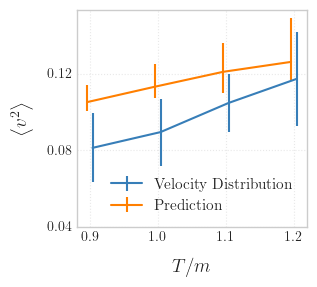

In [91]:
allcs = cycle(allcolors)
fig, ax = plt.subplots(1,1, figsize = (3.3,3.))

col = next(allcs)
ax.errorbar(tempList[:4]/np.sqrt(m2(lamb))+0.004, char_vels**2., yerr = veldistrib_error, \
            color=col, label=r'$\rm Velocity \; Distribution$')

col = next(allcs)
ax.errorbar(tempList[:4]/np.sqrt(m2(lamb))-0.004, sigma_crit, yerr = asymmetric_error/ecrit, \
            color=col, label=r'${\rm Prediction}$')
            #label=r'${\rm Power \; Spectra \;} T_{\rm eff}/E_{\rm crit}$')

a = [round(ii,3) for ii in tempList[:4]/np.sqrt(m2(lamb))]
ax.set_xticks(a)
a = ax.get_yticks()[:-1:2]
ax.set_yticks(a)

ax.grid(True, ls=':', color='lightgray', alpha=0.5)
ax.tick_params(direction='in', which='both', bottom=None, left=None, top=None, right=None)
leg = ax.legend(frameon=False, loc=4)#, bbox_to_anchor=(1., 0.7))._legend_box.align='left'
ax.set_xlabel(r'$T/m$')
ax.set_ylabel(r'$\left<v^2\right>$')
plt.tight_layout()
plt.savefig('./plots/comparison_vcom_pred.pdf')
plt.show()


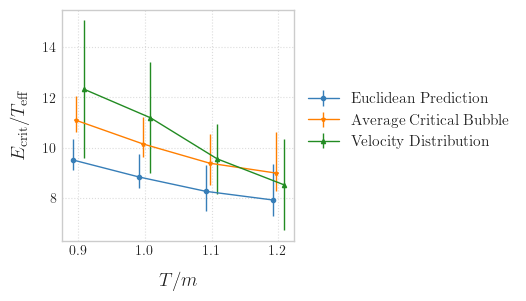

In [93]:
# Plot to compare all energies 
allcs = cycle(allcolors)

fig, ax = plt.subplots(1, 1, figsize = (3.,3.))
col = next(allcs)
ax.errorbar(tempList[:4]/np.sqrt(m2(lamb))-0.0084, 1./sigma_crit, yerr=inverse_asymmetric_error * ecrit, \
            marker='o', markerfacecolor=col, ms=3., lw=1, markeredgecolor=col, label=r'$\rm Euclidean \; Prediction$')

col = next(allcs)
ax.errorbar(tempList[:4]/np.sqrt(m2(lamb))-0.0028, 1./sigma_avbub, yerr=inverse_asymmetric_error * esph, \
            marker='*', markerfacecolor=col, ms=3., lw=1, markeredgecolor=col, label=r'$\rm Average \; Critical \; Bubble$')

col = next(allcs)
ax.errorbar(tempList[:4]/np.sqrt(m2(lamb))+0.0084, 1./np.array(char_vels)**2., yerr=inv_veldistrib_error, \
            marker='^', markerfacecolor=col, ms=3., lw=1, markeredgecolor=col, label=r'$\rm Velocity \; Distribution$')

a = [round(ii,3) for ii in tempList[:4]/np.sqrt(m2(lamb))]
ax.set_xticks(a)
ax.ticklabel_format(axis='x', style='scientific', scilimits=[-1.,0.])
ax.ticklabel_format(axis='y', style='scientific', scilimits=[-10.,10.])

ax.set_ylabel(r'$E_{\rm crit}/T_{\rm eff}$')
ax.set_xlabel(r'$T/m$')

ax.legend(ncol=1, frameon=False, bbox_to_anchor=(1., 0.7))._legend_box.align='left'
ax.grid(which='both', color='darkgray', ls=':', alpha=0.4)
ax.tick_params(direction='in', which='both', bottom=None, left=None, top=None, right=None)

plt.savefig('./plots/critenergy_comparison.pdf')
plt.show()

In [95]:
for ii, average_bubble in enumerate(bubbleList):
    tmp = tmpList[ii]
    phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
    exp_params = np.asarray([nLat, lamb, phi0, temp])

    decay_times = np.load(decay_times_file(*exp_params, minSim, maxSim, nTimeMAX))
    print('N1 = ', len(decay_times))

    minDecTime  = nLat*2//3
    alltimes    = decay_times[:,1]
    simList2Do  = decay_times[alltimes>=minDecTime, 0]
    n2Do        = len(simList2Do)
    print('N2 = ', n2Do)

    veldata = np.array(np.load(velocities_file(*exp_params)))
    simvels, all_vels = veldata[:,0].astype(int), veldata[:,1]
    
    print('N3 = ', len(all_vels))
 #   print(temp, len(all_vels), np.count_nonzero(all_vels > 0.)/len(all_vels))
  #  print(temp, np.count_nonzero(np.abs(all_vels) > 0.5)/len(all_vels))

N1 =  1003
N2 =  665
N3 =  559
N1 =  2192
N2 =  1199
N3 =  956
N1 =  3165
N2 =  1280
N3 =  997
N1 =  3711
N2 =  882
N3 =  591


In [178]:
for ii, average_bubble in enumerate(bubbleList):
    tmp = tmpList[ii]
    phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
    exp_params = np.asarray([nLat, lamb, phi0, temp])

    decay_times = np.load(decay_times_file(*exp_params, minSim, maxSim, nTimeMAX))
    print('N1 = ', len(decay_times))

    minDecTime  = nLat
    alltimes    = decay_times[:,1]
    simList2Do  = decay_times[alltimes>=minDecTime, 0]
    n2Do        = len(simList2Do)
 #   print('N2 = ', n2Do)

    veldata = np.array(np.load(velocities_file(*exp_params)))
    simvels, all_vels = veldata[:,0].astype(int), veldata[:,1]
    
    print('N3 = ', len(all_vels))
  #  print(temp, len(all_vels), 100.*np.count_nonzero(all_vels > 0.)/len(all_vels))
  #  print(temp, 100.*np.count_nonzero(np.abs(all_vels) > 0.3)/len(all_vels))
    print(temp, 100.*np.count_nonzero(np.abs(all_vels) > 0.5)/len(all_vels))    
    

N1 =  1003
N3 =  559
0.09 7.6923076923076925
N1 =  2192
N3 =  956
0.1 10.98326359832636
N1 =  3165
N3 =  997
0.11 13.941825476429289
N1 =  3711
N3 =  591
0.12 16.58206429780034


In [179]:
if False:
    for tmp in range(len(tempList)):
        if tmp!=0: continue

        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])

        # 0 for field; 1 for momentum 
        find = 0
        # modes to plot:
        aa, bb = 1, knyq-1
        labs = labl(lamb, phi0, temp)
        psth = pspec(lamb, phi0, temp)[aa:bb]

        ALL_powspec1 = np.load(powspec_tlist_file(*exp_params, minSim, 2000))
        ALL_powspec2 = np.load(powspec_tlist_file(*exp_params, 2000, maxSim))
        tlist, PSfld1, PSfld2 = ALL_powspec1[0], ALL_powspec1[1], ALL_powspec2[1]

        fig, ax = plt.subplots(1,1, figsize = (8,4))
        camera = Camera(fig)
        for tind, tt in enumerate(tlist):
            avPSfld1 = np.nanmean(PSfld1[:, find, tind, :], axis=0)
            avPSfld2 = np.nanmean(PSfld2[:, find, tind, :], axis=0)
            avPSfld  = np.nanmean(np.array([avPSfld1[:], avPSfld2[:]]), axis=0)
            slice = plt.plot(klist[aa:bb], avPSfld[aa:bb]/psth, ls='-', color='purple')

            ax.set_xscale('log')
            ax.set_yscale('log')
            ax.set_ylabel(r'$P(k)$')
            ax.set_xlabel(r'$k$')
            ax.legend(slice, [f't = {tt}'], loc=1, title=labs)
            camera.snap()
        animation = camera.animate(interval = 0.05);
        animation.save('./plots/animation_cut_PS'+batch_params(*exp_params)+'.gif', writer = 'imagemagick')


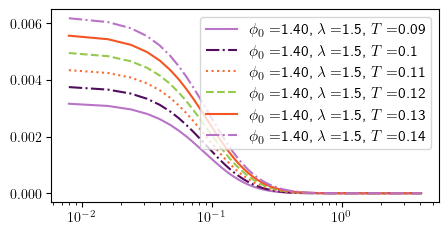

In [180]:
fig, ax = plt.subplots(1,1, figsize = (5,2.5))
for tmp in range(len(tempList)):
    phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
    exp_params = np.asarray([nLat, lamb, phi0, temp])

    aa, bb = 1, knyq-1
    plt.plot(klist[aa:bb], pspec(lamb, phi0, temp)[aa:bb], ls=lsl(tmp), label = labl(lamb, phi0, temp)) # th pow spec
plt.xscale('log')
plt.legend(); plt.show()

In [181]:
if False:
    choose = random.sample(np.arange(4000).tolist(), 4)
    for sim in choose:
        fig, ax = plt.subplots(1,1, figsize = (4,2.5))
        for tmp in range(len(tempList)):
            phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
            exp_params = np.asarray([nLat, lamb, phi0, temp])

            if sim < 2000: minSim, maxSim = 0, 2000
            else: minSim, maxSim, sim = 2000, 4000, sim-2000

            ALL_toten = np.load(toten_tlist_file(*exp_params, minSim, maxSim))
            tlist, energy = ALL_toten[0], ALL_toten[1][sim]

            try: nnrg = np.argwhere(np.isnan(energy)).flatten()[0]
            except: nnrg = len(tlist)+1

            tcut, tencut = tlist[:nnrg], energy[:nnrg]
            tencut = diffen * (tencut - tencut[0]) / tencut[0]
            plt.plot(tcut, tencut, label=labl(lamb, phi0, temp))
        plt.legend(title='Sim='+str(sim), bbox_to_anchor=(1.2,1.))
        plt.show()


In [182]:
if False:
    for tmp in range(len(tempList)):
        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])
        labs = labl(lamb, phi0, temp)
        
        minSim = 2000

        ALL_toten = np.load(toten_tlist_file(*exp_params, minSim, maxSim))
        ALL_emt   = np.load(emt_tlist_file(*exp_params, minSim, maxSim))

        tlist, enfld, emtfld  = ALL_toten[0], ALL_toten[1], ALL_emt[1]

        fig, ax = plt.subplots(1,1, figsize = (4,2.5))
        for sim, (momentum, energy) in enumerate(zip(emtfld, enfld)):
            if sim!=0: continue

            try: nnrg = np.argwhere(np.isnan(energy)).flatten()[0]
            except: nnrg = len(tlist)+1

            tcut, emtcut, tencut = tlist[:nnrg], momentum[:nnrg], energy[:nnrg]
            emtcut = (emtcut - emtcut[0]) / emtcut[0]
            tencut = (tencut - tencut[0]) / tencut[0]

            ax.plot(tcut, tencut, label=(r'$T^{00}$' if sim==0 else None))
            ax.plot(tcut, emtcut, label=(r'$T^{0x}$' if sim==0 else None))

        ax.set_xlabel(r'$\phi_0^{-1} \sqrt{V_0} \; t$')
        ax.set_ylabel(r'$T^{00}, \; T^{0x}$')
        ax.legend(title=labs, bbox_to_anchor=(1.,1.))
        ax.grid(ls=':', color='darkgray', alpha=0.3)
        ax.set_title(labs)
        fig.show()

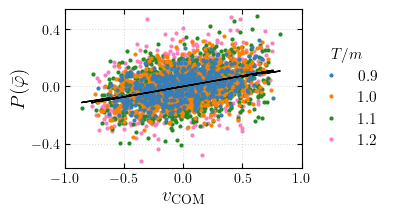

In [407]:
if True:
    fig, ax = plt.subplots(1, 1, figsize=(4.2, 2.3))
    allcs = allcolors[:4]
    for tmp in reversed(range(len(tempList))):
        if tmp>3: continue

        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])
        labss = r'${}$'.format(round(temp/np.sqrt(m2(lamb)),1))#labl(lamb, phi0, temp)
        col = allcs[tmp]

        veldata = np.array(np.load(velocities_file(*exp_params)))
        simvels, all_vels = veldata[:,0].astype(int), veldata[:,1]

        ALL_emt1 = np.load(emt_tlist_file(*exp_params, minSim, 2000))
        ALL_emt2 = np.load(emt_tlist_file(*exp_params, 2000, maxSim))
        emtfld = np.concatenate((ALL_emt1[1], ALL_emt2[1]), axis=0)
        initemt    = dx*emtfld[simvels,0]

        #emtfld = np.load(stdemt0_tlist_file(*exp_params, minSim, maxSim))
        #initemt    = emtfld[simvels]

        ax.plot(all_vels, -initemt, marker='o', ms=2, linestyle='None', label=labss, color=col)
 
        f = lambda x, A: x/A
        pbf, _ = sco.curve_fit(f, all_vels, -initemt) # your data x, y to fit
        ax.plot(all_vels, f(all_vels, *pbf), color='k', linewidth=1)
    
    ax.set_xlim(-1,1)
    ax.set_xlabel(r'$v_{\rm COM}$')
    ax.set_ylabel(r'$P(\bar{\varphi})$')
    ax.grid(ls=':', color='darkgray', alpha=0.3)
    
    h, l = ax.get_legend_handles_labels() # Extracting handles and labels
    h = h[::-1]
    l = l[::-1]
    ax.legend(h,l, title=r'$T/m$', ncol=1, frameon=False, bbox_to_anchor=(1., 0.85))
    ax.grid(which='both', color='darkgray', ls=':', alpha=0.4)
    ax.tick_params(direction='in', which='both', top=True, right=True)

    if True:
        a = ax.get_yticks().tolist()[1:-1:2]
        a = [round(al,2) for al in a]
        ax.set_yticks(a)

    ax.yaxis.set_label_coords(-0.15, 0.5)
    ax.xaxis.set_label_coords(0.5, -0.12)
    ax.ticklabel_format(axis='x', style='sci', scilimits=[-1.,1.])

    plt.tight_layout()
    plt.savefig('./plots/initial_emt_vs_vel.pdf')
    fig.show()


In [409]:
30*dx

23.161213331311373

[0.19215106 0.00062864]
[ 0.17056228 -0.00302195]
[0.17973123 0.00048474]
[0.19060432 0.0006321 ]


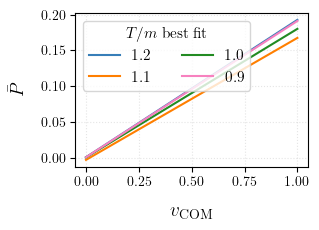

In [185]:
if True:
    fig, ax = plt.subplots(1, 1, figsize=(3, 2))
    allcs = cycle(allcolors)
    for tmp in reversed(range(len(tempList))):
        if tmp>3: continue

        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])
        labss = r'${}$'.format(round(temp/np.sqrt(m2(lamb)),1))#labl(lamb, phi0, temp)
        col = next(allcs)

        veldata = np.array(np.load(velocities_file(*exp_params)))
        simvels, all_vels = veldata[:,0].astype(int), veldata[:,1]

        ALL_emt1 = np.load(emt_tlist_file(*exp_params, minSim, 2000))
        ALL_emt2 = np.load(emt_tlist_file(*exp_params, 2000, maxSim))
        emtfld = np.concatenate((ALL_emt1[1], ALL_emt2[1]), axis=0)
        initemt    = emtfld[simvels,0]

        # fit a straight line
        jfit_times = np.polyfit(all_vels, -initemt, deg=1)
        print(jfit_times)
        vlist = np.linspace(0., 1, 100)
        ax.plot(vlist, get_line(vlist, *jfit_times), '-', label=labss, color=col)

    ax.legend(title=r'$T/m {\rm \; best \; fit}$', loc='best', ncol=2)
    ax.set_xlabel(r'$v_{\rm COM}$')
    ax.set_ylabel(r'$\bar{P}$')
    ax.grid(ls=':', color='darkgray', alpha=0.3)
    fig.show()


In [67]:
if False:
    for tmp in reversed(range(len(tempList))):
        if tmp>3: continue
        
        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])

        path = decay_times_file(*exp_params, minSim, maxSim, nTimeMAX)
        if os.path.exists(path):
            print(path)
            decay_times = np.load(path)

            minDecTime = nLat
            alltimes   = decay_times[:,1]
            simList2Do = decay_times[alltimes>=minDecTime, 0]

            all_vels = []
            for sim in simList2Do:
                path2RESTsim = rest_sim_location(*exp_params, sim)
                if os.path.exists(path2RESTsim):

                    sim, bubble, totbeta = np.load(path2RESTsim)
                    all_vels.append(np.array([sim, totbeta]))

        np.save(velocities_file(*exp_params), all_vels)
        print(len(all_vels), len(simList2Do))
        print('Done!')

0.12 591
0.11 997
0.1 956
0.09 559


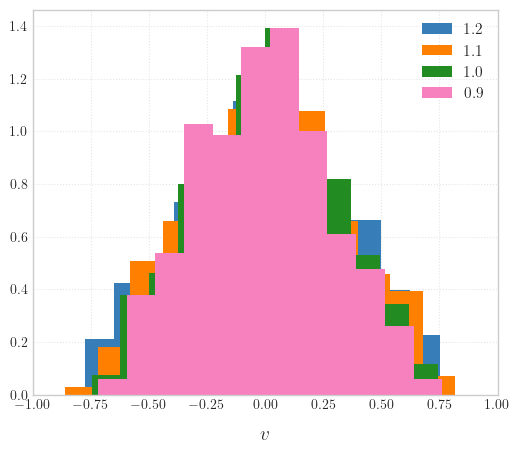

In [68]:
if True:
    fig2, ax = plt.subplots(1, 1, figsize=(6, 5))
    plt.grid(True, ls=':', alpha=0.5)
    for tmp in reversed(range(len(tempList))):
        if tmp>3: continue

        phi0, temp, lamb, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])
        labss = r'${}$'.format(round(temp/np.sqrt(m2(lamb)),1))#labl(lamb, phi0, temp)

        veldata = np.load(velocities_file(*exp_params))
     
        simvels, all_vels = veldata[:,0].astype(int), veldata[:,1]
        print(temp, len(simvels))
        plt.hist(all_vels, bins=12, label=labss, density=True)
    plt.xlim((-1,1))
    plt.legend(title=r'$T/m$', ncol=1, loc='best')
    plt.xlabel(r'$v$')
    plt.legend()
    plt.show()